<a href="https://colab.research.google.com/github/PizdecAnuNahui/Portfolio-Dashboard/blob/main/Dissertation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===========================================
# MODULE 1: DATA DOWNLOAD & PREPARATION
# ===========================================

import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# -------------------------------------------
# Step 1.1: Download daily stock prices & save CSVs
# -------------------------------------------
def download_and_save_prices(ticker_groups, start_date, end_date, save_dir="."):
    """
    Download adjusted close prices for each ticker group and save as CSV files.
    """
    os.makedirs(save_dir, exist_ok=True)

    for group_name, tickers in ticker_groups.items():
        print(f"Downloading {group_name} data...")
        group_prices = {}
        for ticker in tickers:
            df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
            if not df.empty:
                group_prices[ticker] = df['Close']
        if group_prices:
            group_df = pd.concat(group_prices.values(), axis=1)
            group_df.columns = list(group_prices.keys())
            filepath = os.path.join(save_dir, f"{group_name}_stocks.csv")
            group_df.to_csv(filepath)
            print(f"Saved {filepath}")
        else:
            print(f"No data found for {group_name}")

# -------------------------------------------
# Step 1.2: Load price CSV, fill missing, compute log returns
# -------------------------------------------
def load_and_compute_log_returns(filepath):
    """
    Load prices CSV, forward fill missing data, compute daily log returns.
    """
    prices = pd.read_csv(filepath, index_col=0, parse_dates=True)
    prices = prices.ffill()  # Forward fill missing prices to avoid gaps
    log_returns = np.log(prices / prices.shift(1)).dropna()  # Daily log returns
    return log_returns

# -------------------------------------------
# Step 1.3: Construct equal-weighted portfolio returns
# -------------------------------------------
def build_equal_weight_portfolio(log_returns):
    """
    Compute equal weighted portfolio log returns (mean across assets).
    """
    return log_returns.mean(axis=1)

# ===========================================
# MAIN EXECUTION
# ===========================================
if __name__ == "__main__":
    # Define your ticker groups here
    ticker_groups = {
        'fintech': [
            "AFRM", "AXP", "XYZ", "BR", "COIN", "FIS", "FI", "GPN", "INTU",
            "LC", "MA", "PYPL", "FOUR", "SOFI", "TOST", "V", "WU", "WK", "NDAQ"
        ],
        'tech_giants': [
            "ADBE", "AKAM", "GOOGL", "AMZN", "ANSS", "AAPL", "ADSK", "CDNS", "IBM",
            "INTC", "META", "MSFT", "MSI", "NVDA", "ORCL", "CRM", "NOW", "SNPS",
            "TXN", "ZS"
        ],
        'low_esg': [
            "MO", "AAL", "T", "BA", "BP", "CVX", "KO", "CMCSA", "DAL", "XOM", "GS",
            "JPM", "MCD", "NSRGY", "PFE", "SBUX", "TGT", "TSN", "WMT", "WFC"
        ]
    }

    # Define date range for data
    start_date = '2015-01-01'
    end_date = '2022-12-31'

    # Step 1.1: Download and save price data per group
    download_and_save_prices(ticker_groups, start_date, end_date)

    # Confirm files exist after saving
    print("Files in current directory after download:")
    print(os.listdir('.'))

    # Step 1.2: Load prices, fill missing data, compute log returns for each group
    fintech_returns = load_and_compute_log_returns("fintech_stocks.csv")
    tech_returns = load_and_compute_log_returns("tech_giants_stocks.csv")
    low_esg_returns = load_and_compute_log_returns("low_esg_stocks.csv")

    # Step 1.3: Construct equal-weighted portfolios for each group
    fintech_portfolio = build_equal_weight_portfolio(fintech_returns)
    tech_portfolio = build_equal_weight_portfolio(tech_returns)
    low_esg_portfolio = build_equal_weight_portfolio(low_esg_returns)

    # Preview portfolio returns head
    print("FinTech Portfolio Returns Sample:")
    print(fintech_portfolio.head())

/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Clos

Saved ./fintech_stocks.csv


/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Clos

Saved ./tech_giants_stocks.csv


/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
/tmp/ipython-input-2126780509.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Clos

Saved ./low_esg_stocks.csv
Files in current directory after download:
['.config', 'low_esg_stocks.csv', 'fintech_stocks.csv', 'tech_giants_stocks.csv', 'sample_data']
FinTech Portfolio Returns Sample:
Date
2021-09-23    0.021058
2021-09-24   -0.005696
2021-09-27   -0.000246
2021-09-28   -0.034694
2021-09-29   -0.008648
dtype: float64



Performance for FinTech:
Annualized Return:      -57.63%
Annualized Volatility:  42.23%
Sharpe Ratio:           -1.39
Max Drawdown:           -56.44%
CVaR (5%):              0.0547
Skewness:               0.1283
Excess Kurtosis:        0.0070
Omega Ratio (0%):       0.8049

Performance for Tech Giants:
Annualized Return:      11.16%
Annualized Volatility:  28.81%
Sharpe Ratio:           0.35
Max Drawdown:           -40.16%
CVaR (5%):              0.0435
Skewness:               -0.2884
Excess Kurtosis:        4.5112
Omega Ratio (0%):       1.0711

Performance for Low ESG:
Annualized Return:      6.19%
Annualized Volatility:  19.46%
Sharpe Ratio:           0.27
Max Drawdown:           -41.93%
CVaR (5%):              0.0299
Skewness:               -0.8866
Excess Kurtosis:        17.9785
Omega Ratio (0%):       1.0650


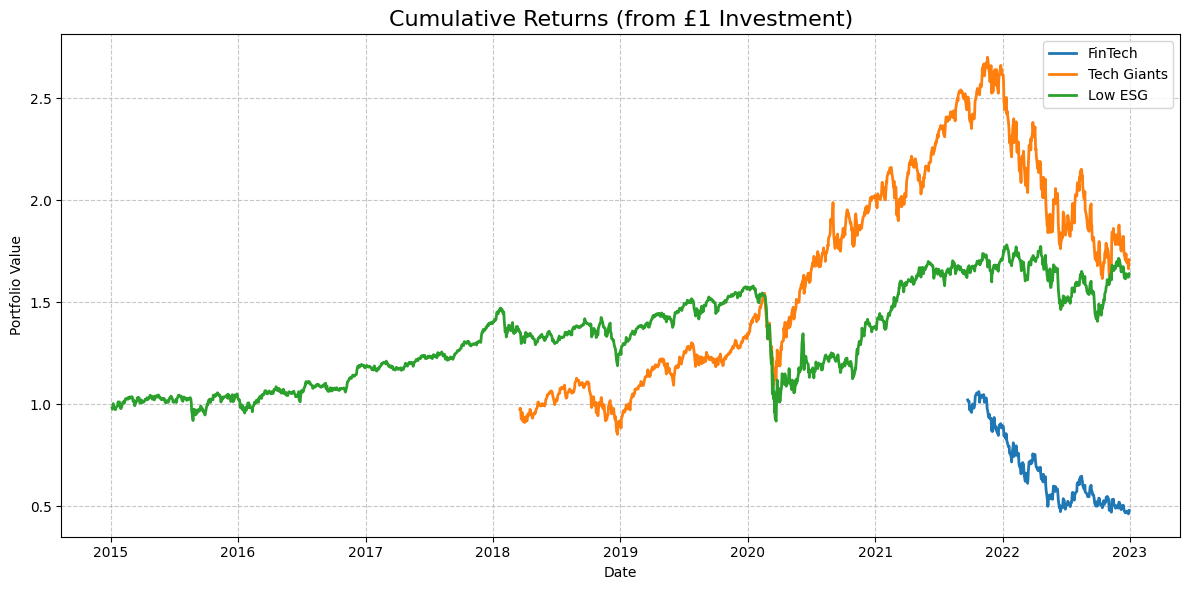

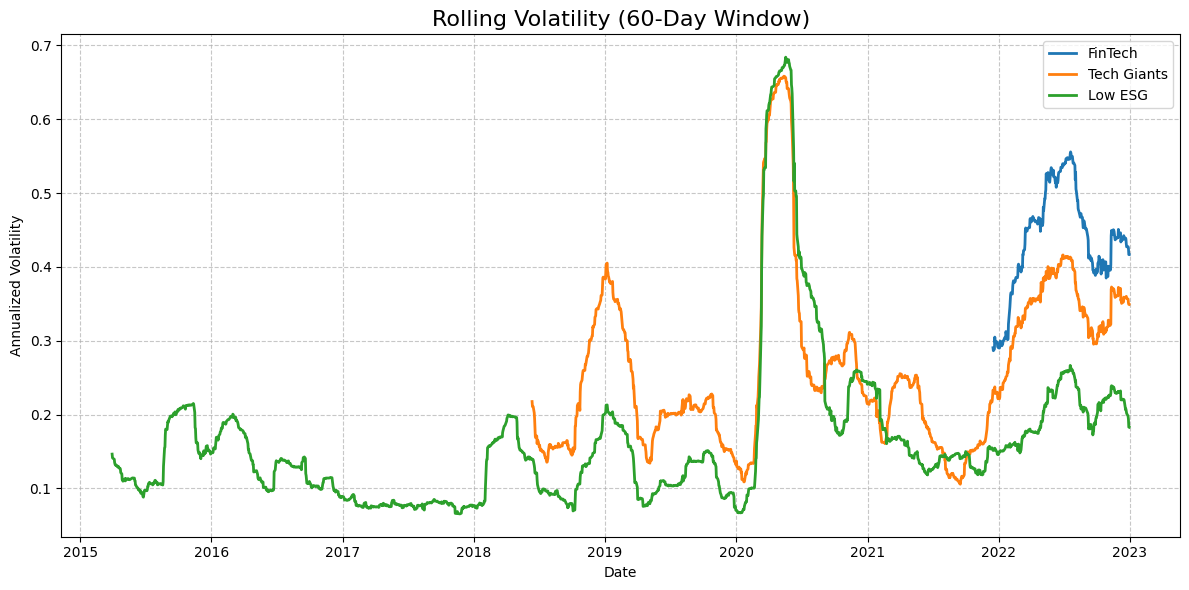

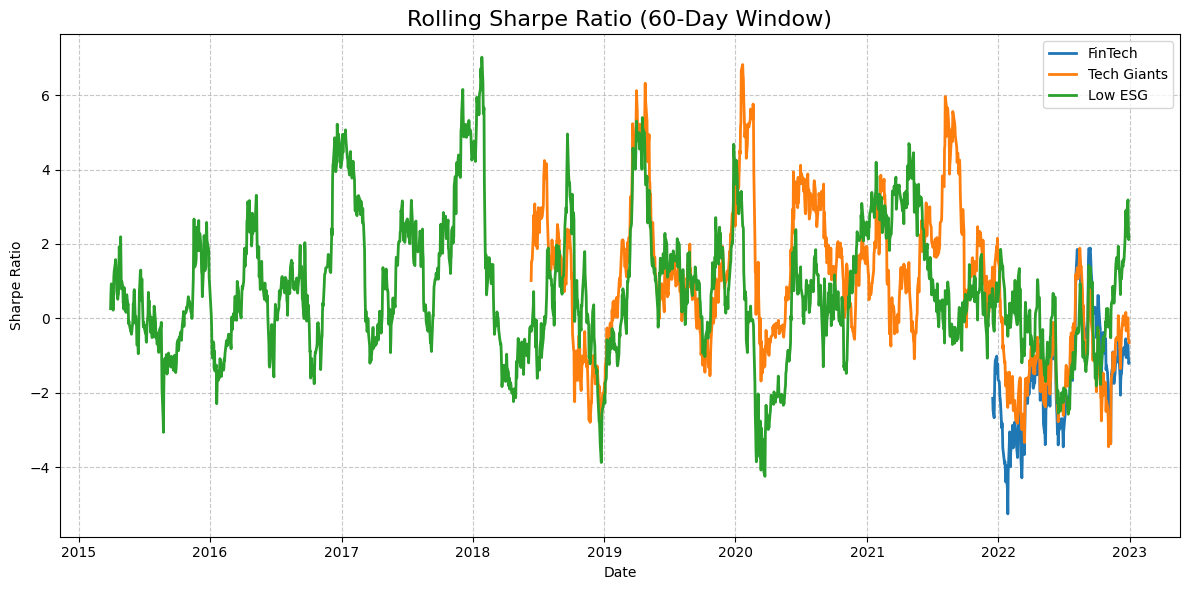

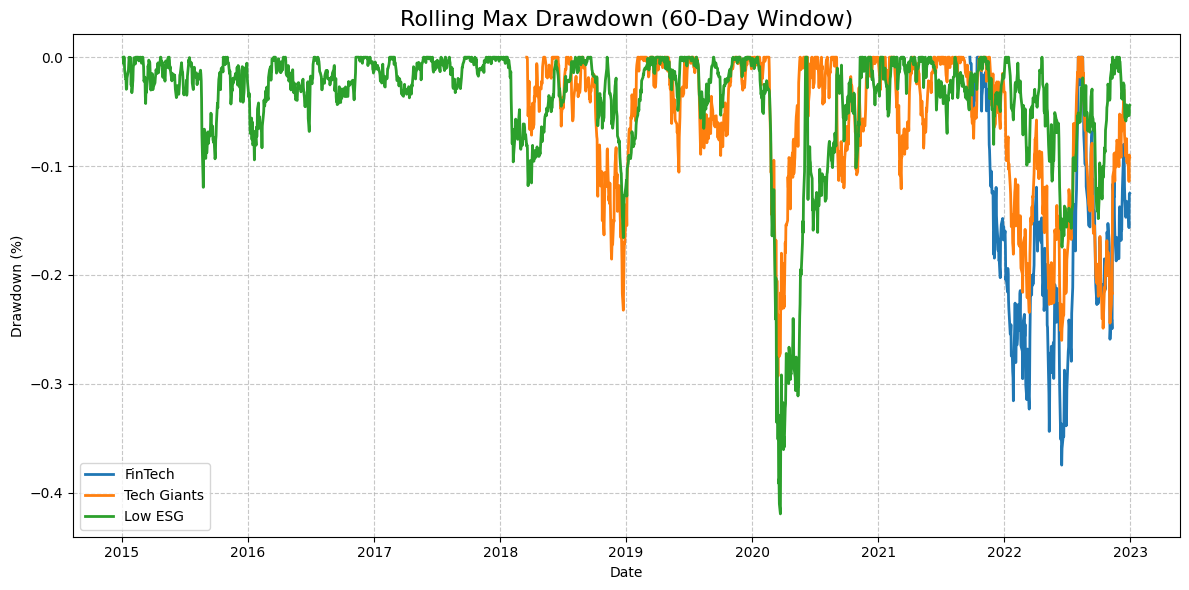

In [ ]:
# ===========================================
# MODULE 2: PORTFOLIO PERFORMANCE & RISK METRICS (Enhanced)
# ===========================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# -------------------------------------------
# Step 2.1: Calculate basic + advanced metrics
# -------------------------------------------
def evaluate_performance(daily_returns, name="Portfolio", risk_free_rate=0.01):
    ann_return = np.mean(daily_returns) * 252
    ann_volatility = np.std(daily_returns) * np.sqrt(252)
    sharpe_ratio = (ann_return - risk_free_rate) / ann_volatility

    cumulative = np.exp(np.cumsum(daily_returns))
    running_max = np.maximum.accumulate(cumulative)
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()

    cvar = compute_cvar(daily_returns)
    skewness, ex_kurtosis = distribution_stats(daily_returns)
    omega = omega_ratio(daily_returns)

    print(f"\nPerformance for {name}:")
    print(f"Annualized Return:      {ann_return:.2%}")
    print(f"Annualized Volatility:  {ann_volatility:.2%}")
    print(f"Sharpe Ratio:           {sharpe_ratio:.2f}")
    print(f"Max Drawdown:           {max_drawdown:.2%}")
    print(f"CVaR (5%):              {-cvar:.4f}")
    print(f"Skewness:               {skewness:.4f}")
    print(f"Excess Kurtosis:        {ex_kurtosis:.4f}")
    print(f"Omega Ratio (0%):       {omega:.4f}")

# -------------------------------------------
# Helper: Conditional Value-at-Risk
# -------------------------------------------
def compute_cvar(series, alpha=0.05):
    sorted_returns = np.sort(series.dropna())
    index = int(alpha * len(sorted_returns))
    return np.mean(sorted_returns[:index])

# -------------------------------------------
# Helper: Skewness and Excess Kurtosis
# -------------------------------------------
def distribution_stats(series):
    return skew(series.dropna()), kurtosis(series.dropna())

# -------------------------------------------
# Helper: Omega Ratio
# -------------------------------------------
def omega_ratio(returns, threshold=0):
    excess = returns - threshold
    gain = excess[excess > 0].sum()
    loss = -excess[excess < 0].sum()
    return gain / loss if loss != 0 else np.nan

# -------------------------------------------
# Step 2.2: Plot cumulative returns
# -------------------------------------------
def plot_cumulative_returns(fintech_portfolio, tech_portfolio, low_esg_portfolio):
    fintech_cum = np.exp(fintech_portfolio.cumsum())
    tech_cum = np.exp(tech_portfolio.cumsum())
    low_esg_cum = np.exp(low_esg_portfolio.cumsum())

    plt.figure(figsize=(12, 6))
    plt.plot(fintech_cum, label="FinTech", linewidth=2)
    plt.plot(tech_cum, label="Tech Giants", linewidth=2)
    plt.plot(low_esg_cum, label="Low ESG", linewidth=2)
    plt.title("Cumulative Returns (from £1 Investment)", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# Step 2.3: Rolling Volatility
# -------------------------------------------
def plot_rolling_volatility(fintech_portfolio, tech_portfolio, low_esg_portfolio, window=60):
    fintech_vol = fintech_portfolio.rolling(window).std() * np.sqrt(252)
    tech_vol = tech_portfolio.rolling(window).std() * np.sqrt(252)
    low_esg_vol = low_esg_portfolio.rolling(window).std() * np.sqrt(252)

    plt.figure(figsize=(12, 6))
    plt.plot(fintech_vol, label="FinTech", linewidth=2)
    plt.plot(tech_vol, label="Tech Giants", linewidth=2)
    plt.plot(low_esg_vol, label="Low ESG", linewidth=2)
    plt.title(f"Rolling Volatility ({window}-Day Window)", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Annualized Volatility")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# Step 2.4: Rolling Sharpe Ratio
# -------------------------------------------
def compute_rolling_sharpe(series, window=60, risk_free_rate=0.01):
    mean = series.rolling(window).mean() * 252
    std = series.rolling(window).std() * np.sqrt(252)
    return (mean - risk_free_rate) / std

def plot_rolling_sharpe(fintech_portfolio, tech_portfolio, low_esg_portfolio, window=60):
    fintech_sharpe = compute_rolling_sharpe(fintech_portfolio, window)
    tech_sharpe = compute_rolling_sharpe(tech_portfolio, window)
    low_esg_sharpe = compute_rolling_sharpe(low_esg_portfolio, window)

    plt.figure(figsize=(12, 6))
    plt.plot(fintech_sharpe, label="FinTech", linewidth=2)
    plt.plot(tech_sharpe, label="Tech Giants", linewidth=2)
    plt.plot(low_esg_sharpe, label="Low ESG", linewidth=2)
    plt.title(f"Rolling Sharpe Ratio ({window}-Day Window)", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Sharpe Ratio")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# Step 2.5: Rolling Max Drawdown
# -------------------------------------------
def compute_rolling_max_drawdown(series, window=60):
    cum_returns = np.exp(series.cumsum())
    roll_max = cum_returns.rolling(window, min_periods=1).max()
    drawdown = (cum_returns - roll_max) / roll_max
    return drawdown

def plot_rolling_max_drawdown(fintech_portfolio, tech_portfolio, low_esg_portfolio, window=60):
    fintech_dd = compute_rolling_max_drawdown(fintech_portfolio, window)
    tech_dd = compute_rolling_max_drawdown(tech_portfolio, window)
    low_esg_dd = compute_rolling_max_drawdown(low_esg_portfolio, window)

    plt.figure(figsize=(12, 6))
    plt.plot(fintech_dd, label="FinTech", linewidth=2)
    plt.plot(tech_dd, label="Tech Giants", linewidth=2)
    plt.plot(low_esg_dd, label="Low ESG", linewidth=2)
    plt.title(f"Rolling Max Drawdown ({window}-Day Window)", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Drawdown (%)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ===========================================
# MAIN EXECUTION for MODULE 2
# ===========================================
if __name__ == "__main__":
    # Make sure these are already defined from Module 1
    # fintech_portfolio, tech_portfolio, low_esg_portfolio

    # Step 2.1: Enhanced performance metrics
    evaluate_performance(fintech_portfolio, "FinTech")
    evaluate_performance(tech_portfolio, "Tech Giants")
    evaluate_performance(low_esg_portfolio, "Low ESG")

    # Step 2.2: Cumulative returns plot
    plot_cumulative_returns(fintech_portfolio, tech_portfolio, low_esg_portfolio)

    # Step 2.3: Rolling volatility
    plot_rolling_volatility(fintech_portfolio, tech_portfolio, low_esg_portfolio)

    # Step 2.4: Rolling Sharpe ratio
    plot_rolling_sharpe(fintech_portfolio, tech_portfolio, low_esg_portfolio)

    # Step 2.5: Rolling max drawdown
    plot_rolling_max_drawdown(fintech_portfolio, tech_portfolio, low_esg_portfolio)

/tmp/ipython-input-3875171354.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download("SPY", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


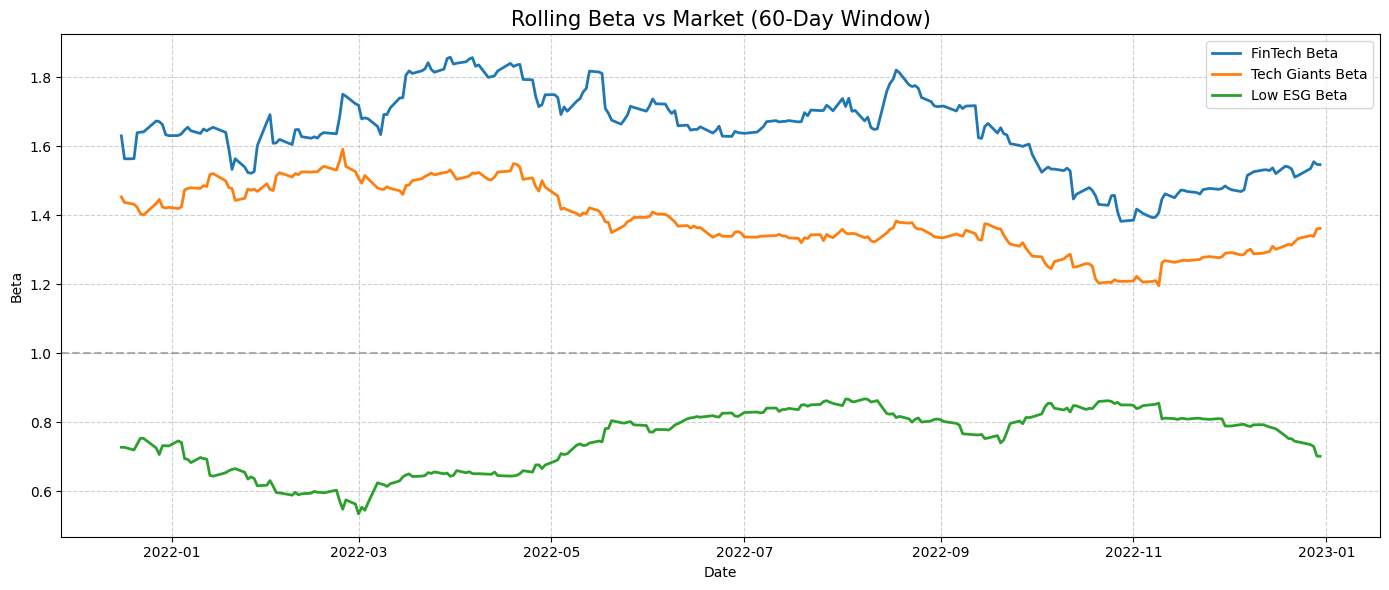

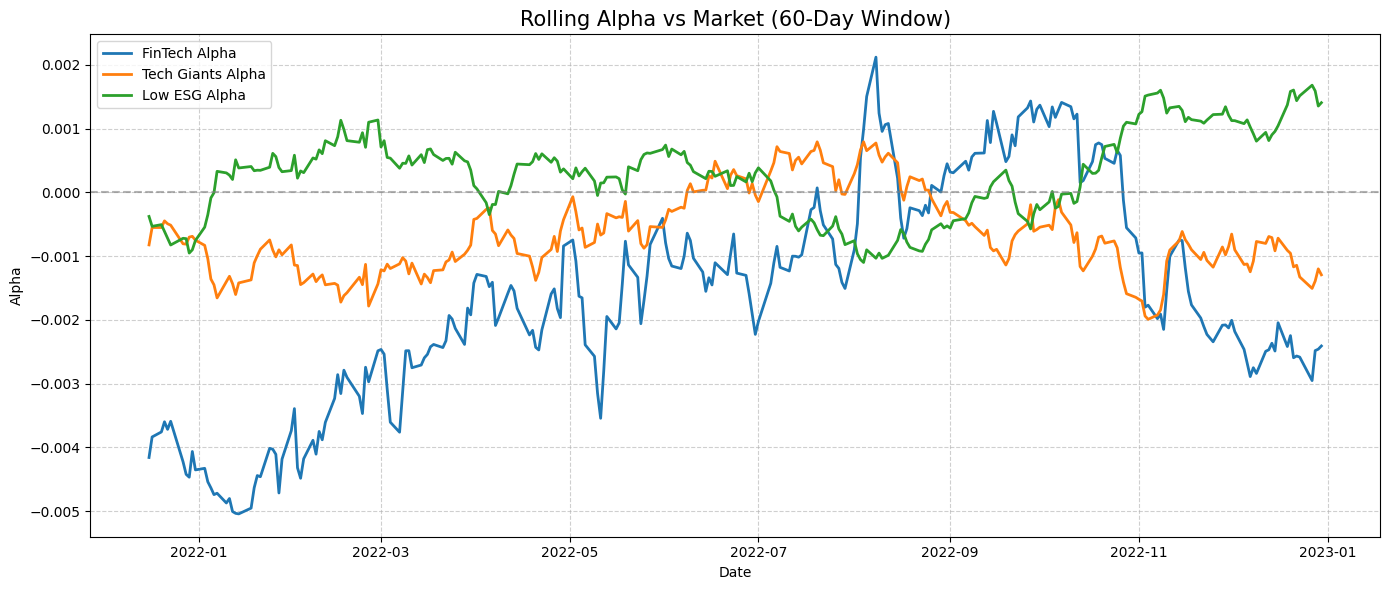

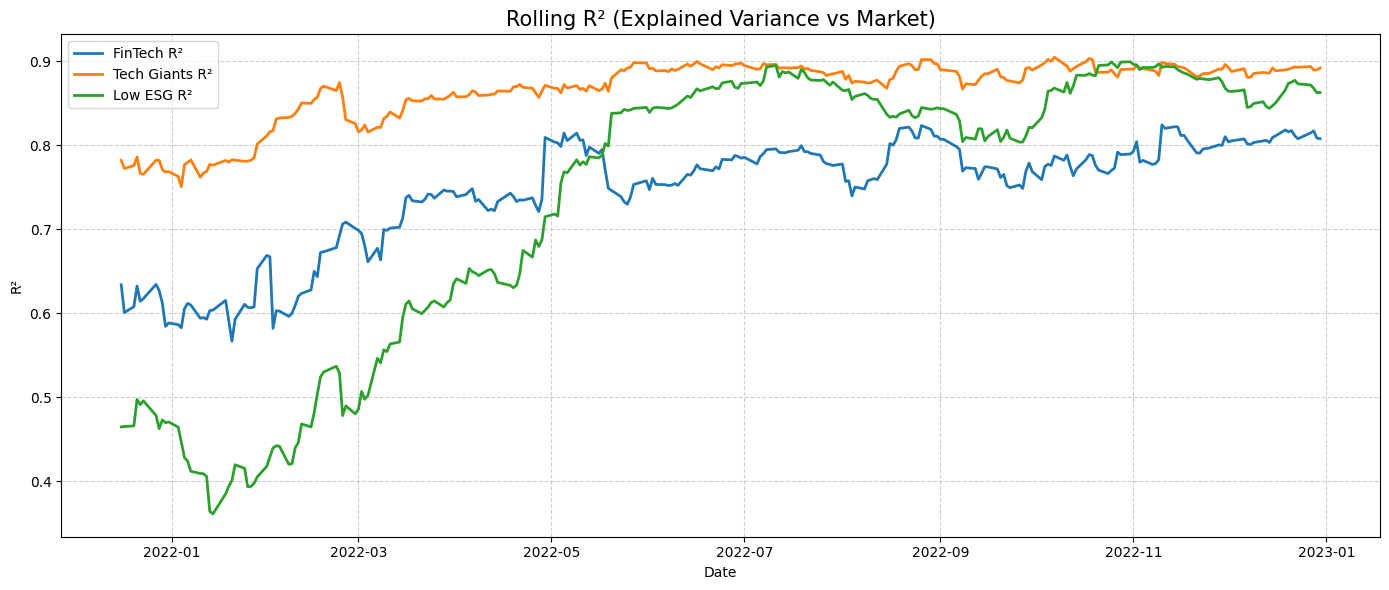

In [ ]:
# ===========================================
# MODULE 3: MARKET EXPOSURE METRICS (ROLLING BETA, ALPHA, R²)
# ===========================================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------------------------------------------
# Step 3.1: Download SPY market returns
# -------------------------------------------
def get_spy_returns(start_date, end_date):
    spy_data = yf.download("SPY", start=start_date, end=end_date)
    spy_prices = spy_data['Close']
    spy_returns = np.log(spy_prices / spy_prices.shift(1)).dropna()
    spy_returns.name = "SPY"
    return spy_returns

# -------------------------------------------
# Step 3.2: Rolling Beta, Alpha, R²
# -------------------------------------------
def rolling_regression_metrics(portfolio_returns, market_returns, window=60):
    beta_list, alpha_list, r2_list, dates = [], [], [], []

    for i in range(len(portfolio_returns) - window + 1):
        y = portfolio_returns.iloc[i:i+window].values.reshape(-1, 1)
        x = market_returns.iloc[i:i+window].values.reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        beta_list.append(reg.coef_[0][0])
        alpha_list.append(reg.intercept_[0])
        r2_list.append(reg.score(x, y))
        dates.append(portfolio_returns.index[i+window-1])

    return (
        pd.Series(beta_list, index=dates),
        pd.Series(alpha_list, index=dates),
        pd.Series(r2_list, index=dates)
    )

# -------------------------------------------
# Step 3.3: Plot Beta, Alpha, R² together
# -------------------------------------------
def plot_all_exposures(
    fintech_alpha, tech_alpha, low_alpha,
    fintech_beta, tech_beta, low_beta,
    fintech_r2, tech_r2, low_r2
):
    # --- Beta Plot ---
    plt.figure(figsize=(14, 6))
    plt.plot(fintech_beta, label="FinTech Beta", linewidth=2)
    plt.plot(tech_beta, label="Tech Giants Beta", linewidth=2)
    plt.plot(low_beta, label="Low ESG Beta", linewidth=2)
    plt.axhline(1, linestyle="--", color="gray", alpha=0.6)
    plt.title("Rolling Beta vs Market (60-Day Window)", fontsize=15)
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- Alpha Plot ---
    plt.figure(figsize=(14, 6))
    plt.plot(fintech_alpha, label="FinTech Alpha", linewidth=2)
    plt.plot(tech_alpha, label="Tech Giants Alpha", linewidth=2)
    plt.plot(low_alpha, label="Low ESG Alpha", linewidth=2)
    plt.axhline(0, linestyle="--", color="gray", alpha=0.6)
    plt.title("Rolling Alpha vs Market (60-Day Window)", fontsize=15)
    plt.xlabel("Date")
    plt.ylabel("Alpha")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- R² Plot ---
    plt.figure(figsize=(14, 6))
    plt.plot(fintech_r2, label="FinTech R²", linewidth=2)
    plt.plot(tech_r2, label="Tech Giants R²", linewidth=2)
    plt.plot(low_r2, label="Low ESG R²", linewidth=2)
    plt.title("Rolling R² (Explained Variance vs Market)", fontsize=15)
    plt.xlabel("Date")
    plt.ylabel("R²")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# MAIN EXECUTION BLOCK for MODULE 3
# -------------------------------------------
if __name__ == "__main__":
    spy_returns = get_spy_returns(start_date, end_date)

    # Align portfolio and market dates
    common_dates = fintech_portfolio.index.intersection(spy_returns.index)
    fintech_aligned = fintech_portfolio.loc[common_dates]
    tech_aligned = tech_portfolio.loc[common_dates]
    low_esg_aligned = low_esg_portfolio.loc[common_dates]
    spy_aligned = spy_returns.loc[common_dates]

    # Compute rolling metrics
    fintech_beta, fintech_alpha, fintech_r2 = rolling_regression_metrics(fintech_aligned, spy_aligned)
    tech_beta, tech_alpha, tech_r2 = rolling_regression_metrics(tech_aligned, spy_aligned)
    low_beta, low_alpha, low_r2 = rolling_regression_metrics(low_esg_aligned, spy_aligned)

    # Plot everything
    plot_all_exposures(
        fintech_alpha, tech_alpha, low_alpha,
        fintech_beta, tech_beta, low_beta,
        fintech_r2, tech_r2, low_r2
    )

# -------------------------------------------
# Saing the files MODULE 3
# -------------------------------------------

    # Combine exposure metrics into DataFrames per group
fintech_exposure = pd.DataFrame({
    'Beta': fintech_beta,
    'Alpha': fintech_alpha,
    'R2': fintech_r2
})
tech_exposure = pd.DataFrame({
    'Beta': tech_beta,
    'Alpha': tech_alpha,
    'R2': tech_r2
})
low_esg_exposure = pd.DataFrame({
    'Beta': low_beta,
    'Alpha': low_alpha,
    'R2': low_r2
})

# Save each to CSV
fintech_exposure.to_csv("fintech_exposure_metrics.csv")
tech_exposure.to_csv("tech_giants_exposure_metrics.csv")
low_esg_exposure.to_csv("low_esg_exposure_metrics.csv")

Mounted at /content/drive


/tmp/ipython-input-1087121701.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-1087121701.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-1087121701.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill').fillna(method='bfill')


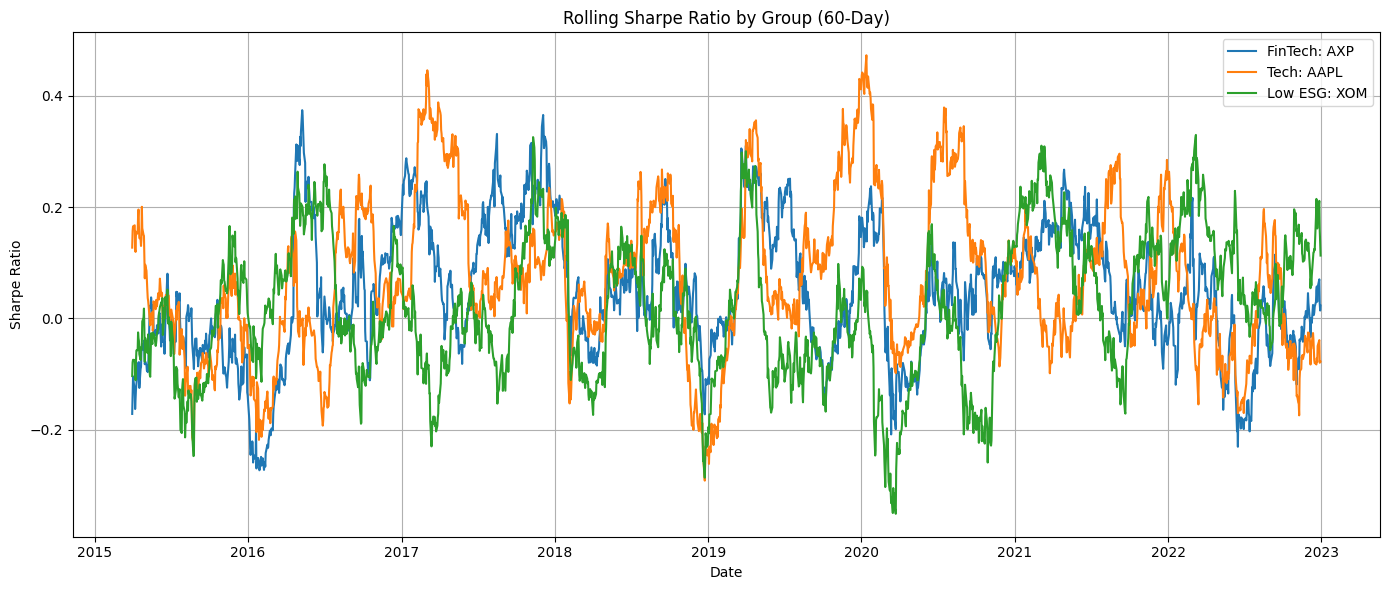

/tmp/ipython-input-1087121701.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bucketed_df, x='ESG_Bucket', y='RollingSharpe', palette='viridis')


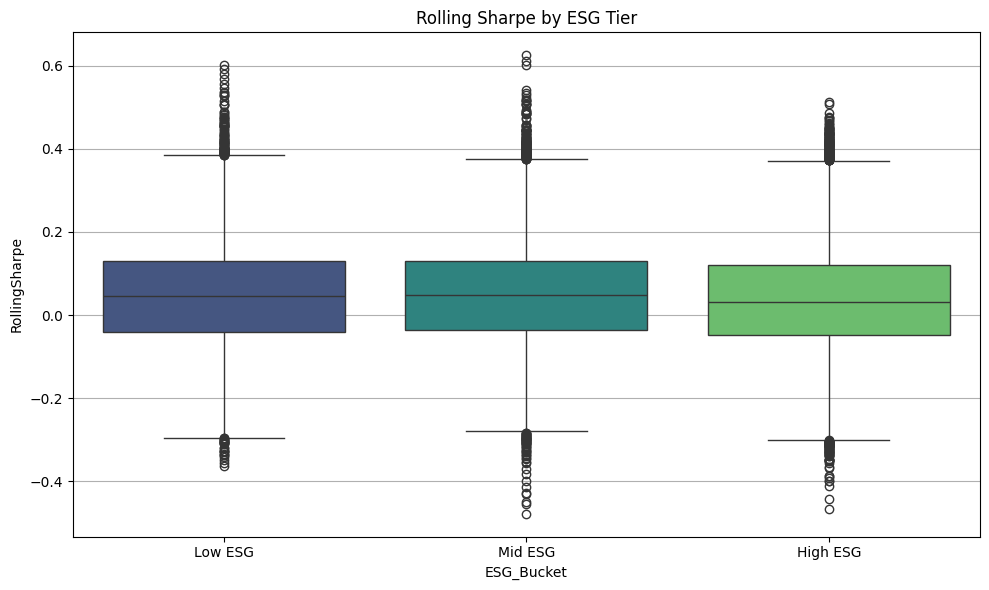


📈 Correlation between Avg ESG and Avg Return: 0.3503


In [ ]:
# ================================
# MODULE 4: ESG INTEGRATION & ENRICHMENT
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Step 4.0: Mount Google Drive
drive.mount('/content/drive')

# Step 4.1: Load ESG data
esg_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/DATA/clean_esg.csv')
esg_df['ESG_Normalized'] = (esg_df["ESG Score"] - esg_df["ESG Score"].min()) / (esg_df["ESG Score"].max() - esg_df["ESG Score"].min())

# Step 4.2: Load return data from Module 1
fintech_returns = pd.read_csv('fintech_stocks.csv', index_col=0, parse_dates=True)
tech_giants_returns = pd.read_csv('tech_giants_stocks.csv', index_col=0, parse_dates=True)
low_esg_returns = pd.read_csv('low_esg_stocks.csv', index_col=0, parse_dates=True)

# Step 4.3: Convert to log returns
def convert_to_log_returns(df):
    df_filled = df.fillna(method='ffill').fillna(method='bfill')
    return np.log(df_filled / df_filled.shift(1)).dropna()

fintech_log_returns = convert_to_log_returns(fintech_returns)
tech_giants_log_returns = convert_to_log_returns(tech_giants_returns)
low_esg_log_returns = convert_to_log_returns(low_esg_returns)

# Step 4.4: Merge ESG with log returns
def merge_esg(log_df, group_name):
    df = log_df.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='LogReturn')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Group'] = group_name
    merged = pd.merge(df, esg_df[['Ticker', 'Year', 'ESG_Normalized']], on=['Ticker', 'Year'], how='left')
    return merged.dropna(subset=['ESG_Normalized'])

fintech_with_esg = merge_esg(fintech_log_returns, 'FinTech')
tech_giants_with_esg = merge_esg(tech_giants_log_returns, 'Tech Giants')
low_esg_with_esg = merge_esg(low_esg_log_returns, 'Low ESG')

# Step 4.5: Rolling Sharpe Ratio
def compute_rolling_sharpe(df, window=60):
    rolling_mean = df.groupby('Ticker')['LogReturn'].transform(lambda x: x.rolling(window).mean())
    rolling_std = df.groupby('Ticker')['LogReturn'].transform(lambda x: x.rolling(window).std())
    return rolling_mean / rolling_std

for df in [fintech_with_esg, tech_giants_with_esg, low_esg_with_esg]:
    df['RollingSharpe'] = compute_rolling_sharpe(df)

# Step 4.6: Save ESG-enriched datasets
fintech_with_esg.to_csv('fintech_with_esg.csv', index=False)
tech_giants_with_esg.to_csv('tech_giants_with_esg.csv', index=False)
low_esg_with_esg.to_csv('low_esg_with_esg.csv', index=False)

# Step 4.7: Visual – ESG vs Rolling Sharpe (AXP, AAPL, XOM)
plt.figure(figsize=(14,6))
plt.plot(fintech_with_esg[fintech_with_esg['Ticker']=='AXP']['Date'], fintech_with_esg[fintech_with_esg['Ticker']=='AXP']['RollingSharpe'], label='FinTech: AXP')
plt.plot(tech_giants_with_esg[tech_giants_with_esg['Ticker']=='AAPL']['Date'], tech_giants_with_esg[tech_giants_with_esg['Ticker']=='AAPL']['RollingSharpe'], label='Tech: AAPL')
plt.plot(low_esg_with_esg[low_esg_with_esg['Ticker']=='XOM']['Date'], low_esg_with_esg[low_esg_with_esg['Ticker']=='XOM']['RollingSharpe'], label='Low ESG: XOM')
plt.title("Rolling Sharpe Ratio by Group (60-Day)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4.8: ESG Bucketing & Analysis
def create_esg_bucketed_df(df):
    df['ESG_Bucket'] = pd.qcut(df['ESG_Normalized'], q=3, labels=['Low ESG', 'Mid ESG', 'High ESG'])
    return df.dropna(subset=['RollingSharpe'])

combined_df = pd.concat([fintech_with_esg, tech_giants_with_esg, low_esg_with_esg])
bucketed_df = create_esg_bucketed_df(combined_df)

# Boxplot: ESG bucket vs rolling Sharpe
plt.figure(figsize=(10, 6))
sns.boxplot(data=bucketed_df, x='ESG_Bucket', y='RollingSharpe', palette='viridis')
plt.title("Rolling Sharpe by ESG Tier")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Step 4.9: Optional – ESG score correlation with returns
corr_df = combined_df.groupby('Ticker')[['LogReturn', 'ESG_Normalized']].mean().dropna()
correlation = corr_df['LogReturn'].corr(corr_df['ESG_Normalized'])
print(f"\n📈 Correlation between Avg ESG and Avg Return: {correlation:.4f}")


# ================================
# Step 4.10: Save remaining useful variables
# ================================

# 1. Save ESG DataFrame with normalized scores
esg_df.to_csv("esg_normalized.csv", index=False)

# 2. Save log return DataFrames before melting
fintech_log_returns.to_csv("fintech_log_returns.csv")
tech_giants_log_returns.to_csv("tech_giants_log_returns.csv")
low_esg_log_returns.to_csv("low_esg_log_returns.csv")

# 3. Save combined ESG-enriched DataFrame
combined_df.to_csv("combined_esg_enriched.csv", index=False)

# 4. Save ESG-bucketed dataset (used in boxplot)
bucketed_df.to_csv("bucketed_esg_sharpe.csv", index=False)

# 5. Save correlation table (avg ESG vs avg return per ticker)
corr_df.to_csv("esg_return_correlation.csv")

# 6. Save correlation value itself as plain text
with open("correlation_value.txt", "w") as f:
    f.write(f"Correlation between Avg ESG and Avg Return: {correlation:.4f}")


In [ ]:
# ================================
# MODULE 5: STATISTICAL TESTS ON ANNUALIZED RETURNS
# ================================

import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Load enriched ESG returns
fintech_with_esg = pd.read_csv('fintech_with_esg.csv', parse_dates=['Date'])
tech_giants_with_esg = pd.read_csv('tech_giants_with_esg.csv', parse_dates=['Date'])
low_esg_with_esg = pd.read_csv('low_esg_with_esg.csv', parse_dates=['Date'])

# Step 5.1: Compute equal-weighted portfolio return per day
def compute_daily_portfolio(df, group_name):
    daily_group = df.groupby(['Date'])['LogReturn'].mean().reset_index()
    daily_group.columns = ['Date', 'LogReturn']
    daily_group['Group'] = group_name
    return daily_group

fintech_df = compute_daily_portfolio(fintech_with_esg, 'FinTech')
tech_df = compute_daily_portfolio(tech_giants_with_esg, 'TechGiants')
low_esg_df = compute_daily_portfolio(low_esg_with_esg, 'LowESG')

# Step 5.2: Save to CSV for later backtesting (Module 8)
fintech_df.to_csv('fintech_portfolio.csv', index=False)
tech_df.to_csv('tech_portfolio.csv', index=False)
low_esg_df.to_csv('low_esg_portfolio.csv', index=False)
print("Saved fintech_portfolio.csv, tech_portfolio.csv, low_esg_portfolio.csv")

# Step 5.3: Annualized Return Calculation
def get_annual_returns(df):
    df['Year'] = df['Date'].dt.year
    annual = df.groupby(['Year'])['LogReturn'].sum().reset_index()
    annual['AnnualReturn'] = np.exp(annual['LogReturn']) - 1
    return annual['AnnualReturn']

fintech_annual = get_annual_returns(fintech_df)
tech_annual = get_annual_returns(tech_df)
low_esg_annual = get_annual_returns(low_esg_df)

# Step 5.4: ANOVA test
anova_result = stats.f_oneway(fintech_annual, tech_annual, low_esg_annual)
print(f"\nANOVA result: F = {anova_result.statistic:.4f}, p = {anova_result.pvalue:.5f}")

# Step 5.5: Pairwise T-tests with Bonferroni correction
pairs = [
    ("FinTech vs TechGiants", fintech_annual, tech_annual),
    ("FinTech vs LowESG", fintech_annual, low_esg_annual),
    ("TechGiants vs LowESG", tech_annual, low_esg_annual)
]

p_vals = []
for name, sample1, sample2 in pairs:
    t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
    p_vals.append(p_val)
    print(f"{name}: t = {t_stat:.3f}, p = {p_val:.5f}")

# Step 5.6: Apply Bonferroni correction
reject, corrected, _, _ = multipletests(p_vals, alpha=0.05, method='bonferroni')
print("\nBonferroni Corrected P-values:")
for i, (name, _, _) in enumerate(pairs):
    print(f"{name}: p_corrected = {corrected[i]:.5f}, reject_null = {reject[i]}")


# ================================
# MODULE 5: Saving
# ================================

# Save annualized returns per group
fintech_annual.to_csv("fintech_annual_returns.csv", index=False)
tech_annual.to_csv("tech_annual_returns.csv", index=False)
low_esg_annual.to_csv("low_esg_annual_returns.csv", index=False)

# Save ANOVA result to text
with open("anova_result.txt", "w") as f:
    f.write(f"F-statistic: {anova_result.statistic:.4f}\n")
    f.write(f"P-value: {anova_result.pvalue:.5f}\n")

# Save pairwise t-test results and Bonferroni correction
ttest_results = pd.DataFrame({
    "Comparison": [name for name, _, _ in pairs],
    "Raw_P_Value": p_vals,
    "Corrected_P_Value": corrected,
    "Reject_Null": reject
})
ttest_results.to_csv("pairwise_ttests_bonferroni.csv", index=False)


Saved fintech_portfolio.csv, tech_portfolio.csv, low_esg_portfolio.csv

ANOVA result: F = 0.9283, p = 0.41086
FinTech vs TechGiants: t = -0.830, p = 0.42077
FinTech vs LowESG: t = 0.444, p = 0.66470
TechGiants vs LowESG: t = 1.349, p = 0.20463

Bonferroni Corrected P-values:
FinTech vs TechGiants: p_corrected = 1.00000, reject_null = False
FinTech vs LowESG: p_corrected = 1.00000, reject_null = False
TechGiants vs LowESG: p_corrected = 0.61388, reject_null = False



FinTech Cross-validated RMSE scores:
 Fold 1: 0.018745
 Fold 2: 0.022609
 Fold 3: 0.032944
 Fold 4: 0.021007
 Fold 5: 0.019902
 Average RMSE: 0.023041


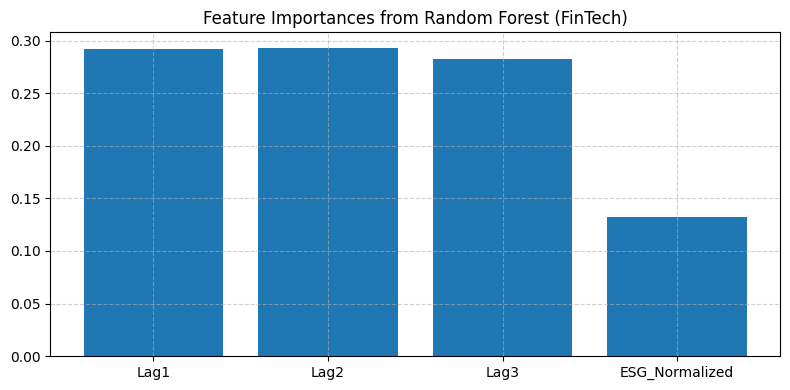


Tech Giants Cross-validated RMSE scores:
 Fold 1: 0.021411
 Fold 2: 0.019758
 Fold 3: 0.021072
 Fold 4: 0.023951
 Fold 5: 0.020714
 Average RMSE: 0.021381


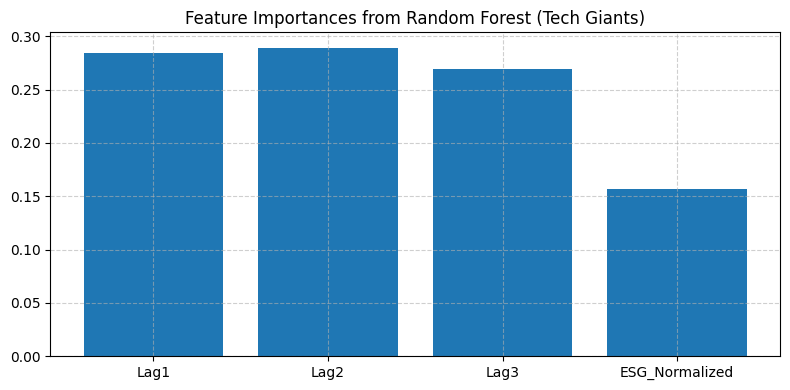


Low ESG Cross-validated RMSE scores:
 Fold 1: 0.023450
 Fold 2: 0.020592
 Fold 3: 0.016591
 Fold 4: 0.016491
 Fold 5: 0.018863
 Average RMSE: 0.019198


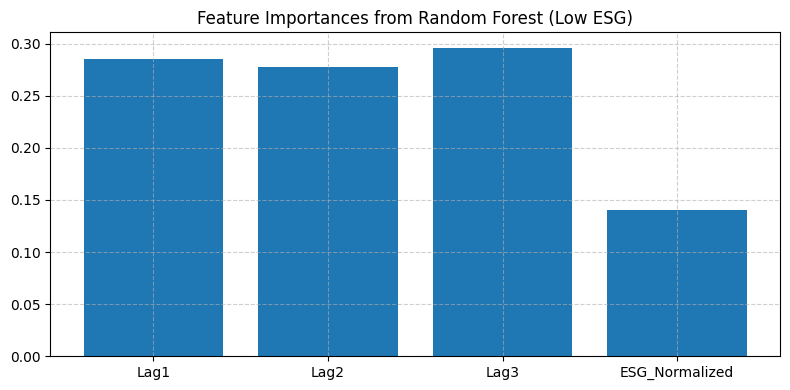

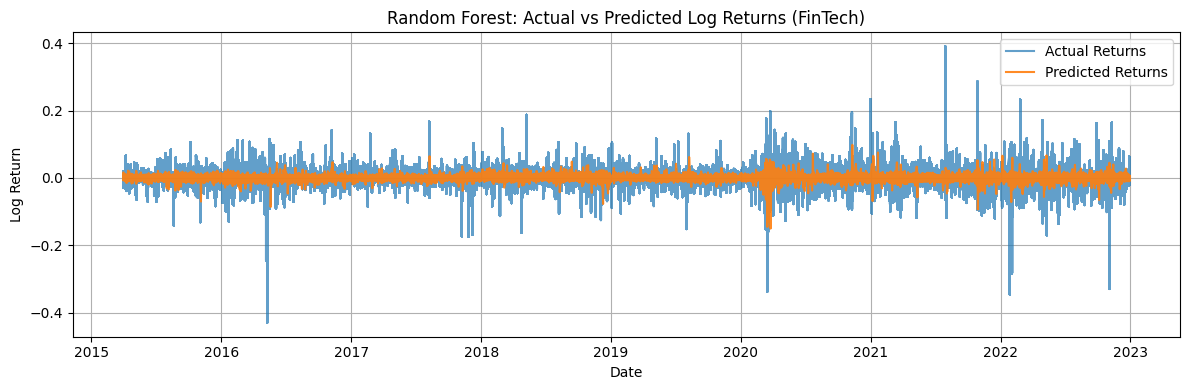

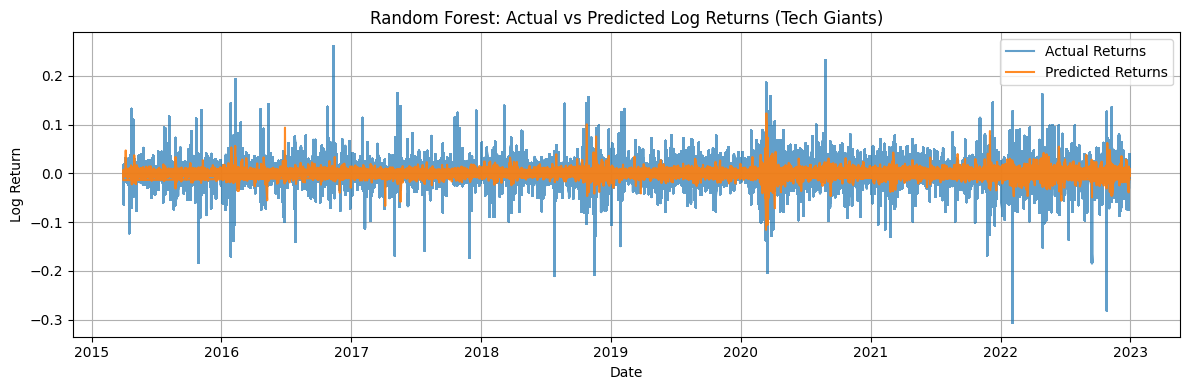

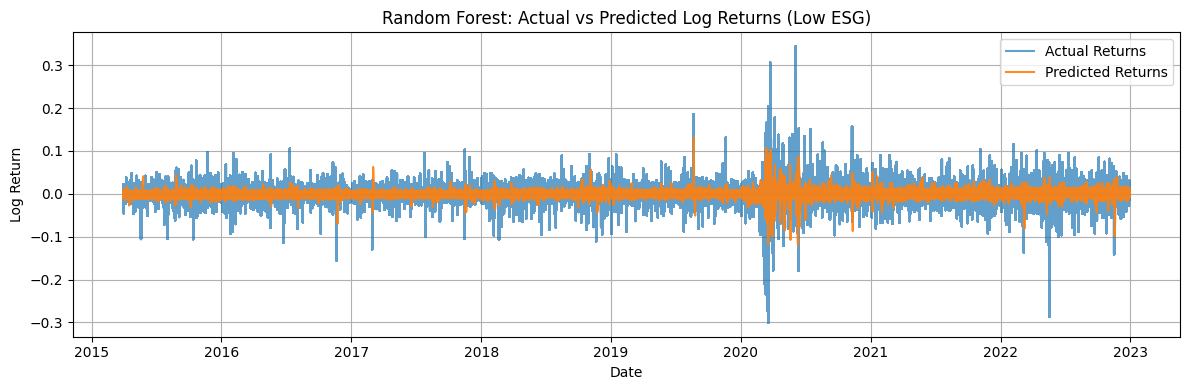

In [ ]:
# ===========================================
# MODULE 6: MACHINE LEARNING MODELS FOR RETURN PREDICTION
# ===========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# -------------------------------------------
# Step 6.1: Prepare features and target variable for ML models
# -------------------------------------------
def prepare_features(df):
    """
    Create lagged features and select ESG_Normalized as features.
    """
    df = df.copy()
    df['Lag1'] = df['LogReturn'].shift(1)
    df['Lag2'] = df['LogReturn'].shift(2)
    df['Lag3'] = df['LogReturn'].shift(3)
    df = df.dropna()

    X = df[['Lag1', 'Lag2', 'Lag3', 'ESG_Normalized']]
    y = df['LogReturn']
    return X, y

# -------------------------------------------
# Step 6.2: Train Random Forest with TimeSeriesSplit and return predictions
# -------------------------------------------
def run_random_forest(X, y, group_name):
    """
    Train Random Forest using TimeSeriesSplit and return predicted values aligned with dates.
    """
    tscv = TimeSeriesSplit(n_splits=5)
    rmses = []
    feature_importances = np.zeros(X.shape[1])

    preds = pd.Series(index=X.index, dtype=float)  # FIXED: use X.index to preserve datetime alignment

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        preds.iloc[test_index] = y_pred  # aligned by index position

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmses.append(rmse)
        feature_importances += model.feature_importances_

    feature_importances /= tscv.get_n_splits()

    print(f"\n{group_name} Cross-validated RMSE scores:")
    for i, rmse in enumerate(rmses, 1):
        print(f" Fold {i}: {rmse:.6f}")
    print(f" Average RMSE: {np.mean(rmses):.6f}")

    # Plot feature importances
    plt.figure(figsize=(8, 4))
    plt.bar(X.columns, feature_importances)
    plt.title(f"Feature Importances from Random Forest ({group_name})")
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return preds

# -------------------------------------------
# Step 6.3: Plot results
# -------------------------------------------
def plot_results(df, preds, group_name):
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['LogReturn'], label="Actual Returns", alpha=0.7)
    plt.plot(preds.index, preds, label="Predicted Returns", alpha=0.9)
    plt.title(f"Random Forest: Actual vs Predicted Log Returns ({group_name})")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# MAIN EXECUTION for MODULE 6
# -------------------------------------------
if __name__ == "__main__":
    # Load ESG-enriched data (if not already in memory)
    fintech_with_esg = pd.read_csv('fintech_with_esg.csv', parse_dates=['Date'])
    tech_giants_with_esg = pd.read_csv('tech_giants_with_esg.csv', parse_dates=['Date'])
    low_esg_with_esg = pd.read_csv('low_esg_with_esg.csv', parse_dates=['Date'])

    # Ensure datetime index
    fintech_with_esg.set_index('Date', inplace=True)
    tech_giants_with_esg.set_index('Date', inplace=True)
    low_esg_with_esg.set_index('Date', inplace=True)

    # Prepare features and target
    X_fintech, y_fintech = prepare_features(fintech_with_esg)
    X_tech, y_tech = prepare_features(tech_giants_with_esg)
    X_low_esg, y_low_esg = prepare_features(low_esg_with_esg)

    # Run Random Forest
    preds_fintech = run_random_forest(X_fintech, y_fintech, "FinTech")
    preds_tech = run_random_forest(X_tech, y_tech, "Tech Giants")
    preds_low_esg = run_random_forest(X_low_esg, y_low_esg, "Low ESG")

    # Plot actual vs predicted
    plot_results(fintech_with_esg.loc[preds_fintech.index], preds_fintech, "FinTech")
    plot_results(tech_giants_with_esg.loc[preds_tech.index], preds_tech, "Tech Giants")
    plot_results(low_esg_with_esg.loc[preds_low_esg.index], preds_low_esg, "Low ESG")

    # Save predictions to CSV
    preds_fintech.to_frame(name='PredictedReturns').to_csv('preds_fintech.csv', index=True)
    preds_tech.to_frame(name='PredictedReturns').to_csv('preds_tech.csv', index=True)
    preds_low_esg.to_frame(name='PredictedReturns').to_csv('preds_low_esg.csv', index=True)

    # Save portfolio returns
    fintech_portfolio.to_csv('fintech_portfolio.csv', header=['LogReturn'])
    tech_portfolio.to_csv('tech_portfolio.csv', header=['LogReturn'])
    low_esg_portfolio.to_csv('low_esg_portfolio.csv', header=['LogReturn'])


# -------------------------------------------
# MODULE 6: Saving
# -------------------------------------------

import json

# 1. Save predictions
preds_fintech.to_frame(name='PredictedReturns').to_csv('preds_fintech.csv', index=True)
preds_tech.to_frame(name='PredictedReturns').to_csv('preds_tech.csv', index=True)
preds_low_esg.to_frame(name='PredictedReturns').to_csv('preds_low_esg.csv', index=True)

# 2. Save portfolio returns (actual targets)
fintech_portfolio = y_fintech.to_frame(name='LogReturn')
tech_portfolio = y_tech.to_frame(name='LogReturn')
low_esg_portfolio = y_low_esg.to_frame(name='LogReturn')

fintech_portfolio.to_csv('fintech_portfolio.csv')
tech_portfolio.to_csv('tech_portfolio.csv')
low_esg_portfolio.to_csv('low_esg_portfolio.csv')

# 3. Save feature sets
X_fintech.to_csv('X_fintech.csv')
X_tech.to_csv('X_tech.csv')
X_low_esg.to_csv('X_low_esg.csv')

# 4. Save target variables
y_fintech.to_csv('y_fintech.csv', header=['LogReturn'])
y_tech.to_csv('y_tech.csv', header=['LogReturn'])
y_low_esg.to_csv('y_low_esg.csv', header=['LogReturn'])

# 5. Save RF metrics (RMSE + feature importances)
def save_rf_metrics(rmses, feature_importances, X, filename):
    data = {
        "RMSE_Folds": [float(r) for r in rmses],
        "Avg_RMSE": float(np.mean(rmses)),
        "FeatureImportances": dict(zip(X.columns, feature_importances))
    }
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)

# Re-run models to collect feature importances and RMSEs for saving
def rerun_rf_and_save(X, y, group_name):
    tscv = TimeSeriesSplit(n_splits=5)
    rmses = []
    feature_importances = np.zeros(X.shape[1])
    preds = pd.Series(index=X.index, dtype=float)

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        preds.iloc[test_index] = model.predict(X_test)
        rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
        feature_importances += model.feature_importances_
    feature_importances /= tscv.get_n_splits()
    save_rf_metrics(rmses, feature_importances, X, f'{group_name.lower().replace(" ", "_")}_rf_metrics.json')

# Save metrics for all groups
rerun_rf_and_save(X_fintech, y_fintech, "FinTech")
rerun_rf_and_save(X_tech, y_tech, "Tech Giants")
rerun_rf_and_save(X_low_esg, y_low_esg, "Low ESG")


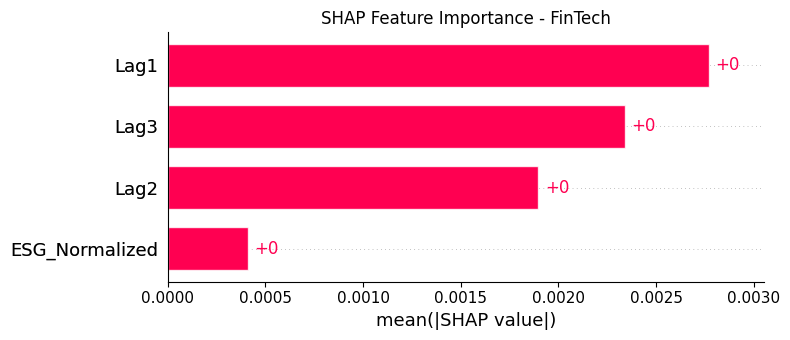

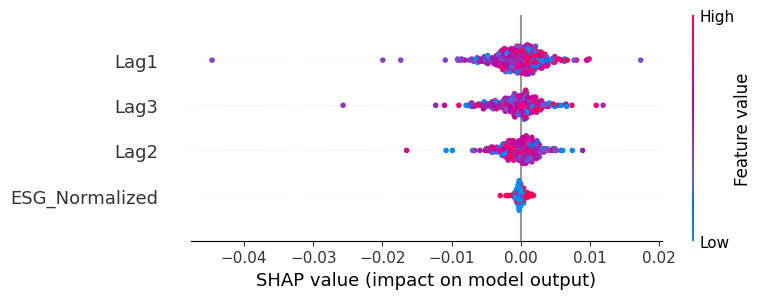

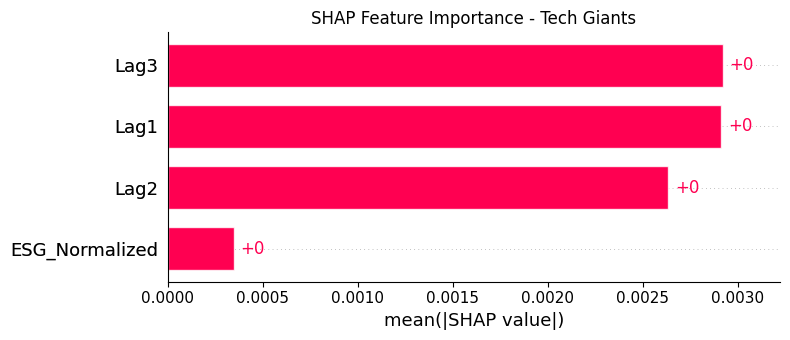

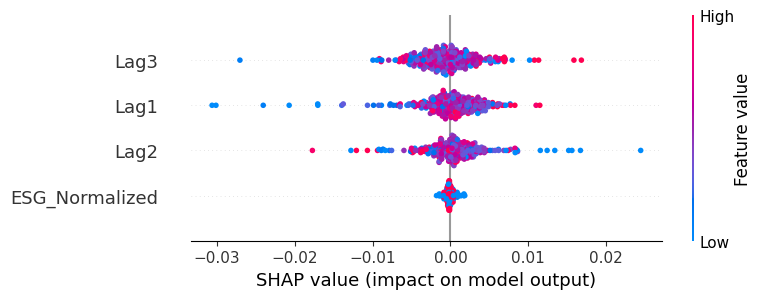

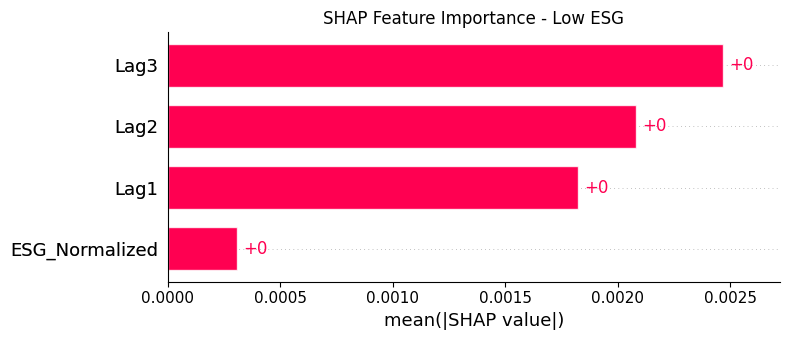

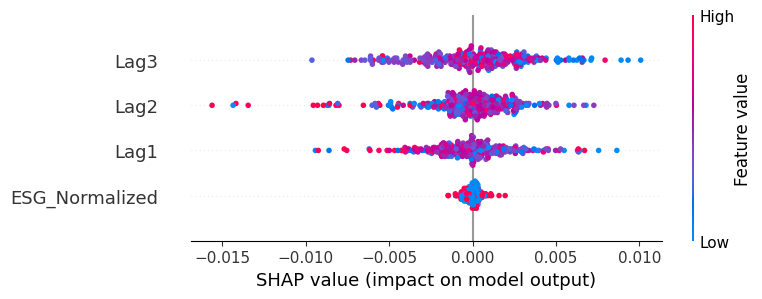

['rf_model_low.pkl']

In [ ]:
# =====================================
# MODULE 7: SHAP Explainability (Random Forest)
# =====================================

import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# -------------------------------------
# Step 7.1: Load feature sets and targets
# -------------------------------------
X_fintech = pd.read_csv('X_fintech.csv', index_col=0, parse_dates=True)
y_fintech = pd.read_csv('y_fintech.csv', index_col=0, parse_dates=True).squeeze()

# Optional: Subsample to speed up SHAP
sample_size = 300
X_sampled, _, y_sampled, _ = train_test_split(X_fintech, y_fintech, train_size=sample_size, shuffle=False)

# -------------------------------------
# Step 7.2: Train Random Forest (again) on subsample
# -------------------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_sampled, y_sampled)

# -------------------------------------
# Step 7.3: Initialize SHAP Explainer
# -------------------------------------
explainer = shap.Explainer(rf_model, X_sampled)
shap_values = explainer(X_sampled)

# -------------------------------------
# Step 7.4: SHAP Plots
# -------------------------------------

# SHAP Summary Bar Plot
plt.title("SHAP Feature Importance - FinTech")
shap.plots.bar(shap_values, show=False)
plt.tight_layout()
plt.savefig("shap_bar_fintech.png")
plt.show()

# SHAP Beeswarm Plot
shap.plots.beeswarm(shap_values, show=False)
plt.tight_layout()
plt.savefig("shap_beeswarm_fintech.png")
plt.show()

# SHAP Force Plot (first observation)
shap.initjs()
force_plot = shap.plots.force(shap_values[0])
shap.save_html("shap_force_fintech.html", force_plot)

# =====================================================
# SHAP EXPLAINABILITY – TECH GIANTS
# =====================================================
X_tech = pd.read_csv('X_tech.csv', index_col=0, parse_dates=True)
y_tech = pd.read_csv('y_tech.csv', index_col=0, parse_dates=True).squeeze()

# Subsample
X_tech_sampled, _, y_tech_sampled, _ = train_test_split(X_tech, y_tech, train_size=300, shuffle=False)

# Train model
rf_tech = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tech.fit(X_tech_sampled, y_tech_sampled)

# SHAP
explainer_tech = shap.Explainer(rf_tech, X_tech_sampled)
shap_tech = explainer_tech(X_tech_sampled)

# Plots
shap.plots.bar(shap_tech, show=False)
plt.title("SHAP Feature Importance - Tech Giants")
plt.tight_layout()
plt.savefig("shap_bar_tech.png")
plt.show()

shap.plots.beeswarm(shap_tech, show=False)
plt.tight_layout()
plt.savefig("shap_beeswarm_tech.png")
plt.show()

shap.initjs()
force_tech = shap.plots.force(shap_tech[0])
shap.save_html("shap_force_tech.html", force_tech)

# =====================================================
# SHAP EXPLAINABILITY – LOW ESG
# =====================================================
X_low = pd.read_csv('X_low_esg.csv', index_col=0, parse_dates=True)
y_low = pd.read_csv('y_low_esg.csv', index_col=0, parse_dates=True).squeeze()

# Subsample
X_low_sampled, _, y_low_sampled, _ = train_test_split(X_low, y_low, train_size=300, shuffle=False)

# Train model
rf_low = RandomForestRegressor(n_estimators=100, random_state=42)
rf_low.fit(X_low_sampled, y_low_sampled)

# SHAP
explainer_low = shap.Explainer(rf_low, X_low_sampled)
shap_low = explainer_low(X_low_sampled)

# Plots
shap.plots.bar(shap_low, show=False)
plt.title("SHAP Feature Importance - Low ESG")
plt.tight_layout()
plt.savefig("shap_bar_low_esg.png")
plt.show()

shap.plots.beeswarm(shap_low, show=False)
plt.tight_layout()
plt.savefig("shap_beeswarm_low_esg.png")
plt.show()

shap.initjs()
force_low = shap.plots.force(shap_low[0])
shap.save_html("shap_force_low_esg.html", force_low)


# -------------------------------------
# Step 7.5: Saved
# -------------------------------------

#1. Save SHAP values
np.save("shap_values_fintech.npy", shap_values.values)
np.save("shap_values_tech.npy", shap_tech.values)
np.save("shap_values_low.npy", shap_low.values)

#2. Save trained Random Forest models
import joblib

joblib.dump(rf_model, 'rf_model_fintech.pkl')
joblib.dump(rf_tech, 'rf_model_tech.pkl')
joblib.dump(rf_low, 'rf_model_low.pkl')



===== FinTech Strategy Performance =====
Annualized Return:     0.0981
Annualized Volatility: 0.1272
Sharpe Ratio:          0.7708
Max Drawdown:          -0.8561

--- FinTech Benchmark Metrics ---
Annualized Return:     0.0847
Annualized Volatility: 0.3776
Sharpe Ratio:          0.2244
Max Drawdown:          -0.9927


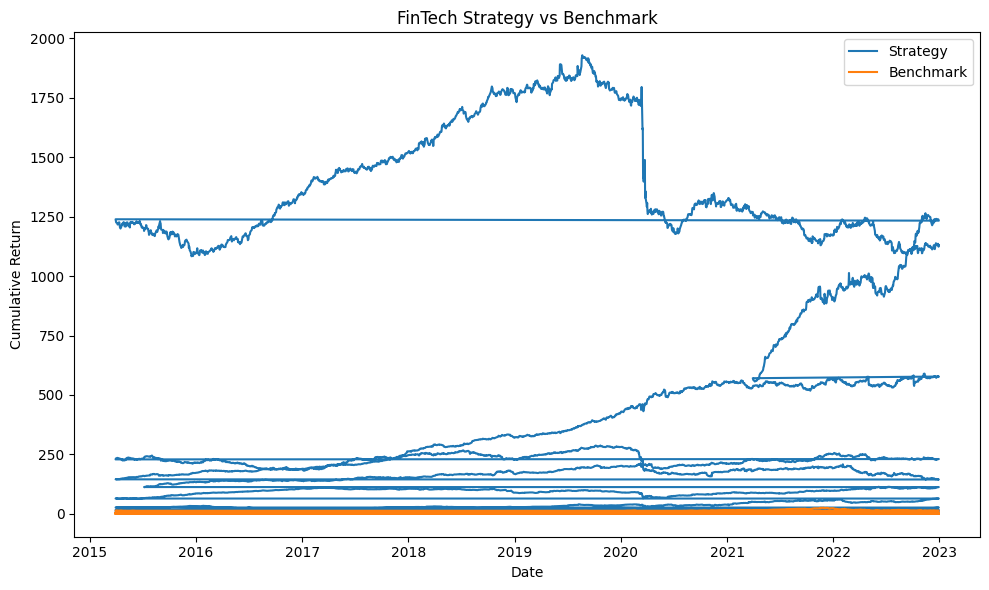


===== Tech Giants Strategy Performance =====
Annualized Return:     0.1480
Annualized Volatility: 0.1103
Sharpe Ratio:          1.3424
Max Drawdown:          -0.6963

--- Tech Giants Benchmark Metrics ---
Annualized Return:     0.1712
Annualized Volatility: 0.3325
Sharpe Ratio:          0.5149
Max Drawdown:          -0.8175


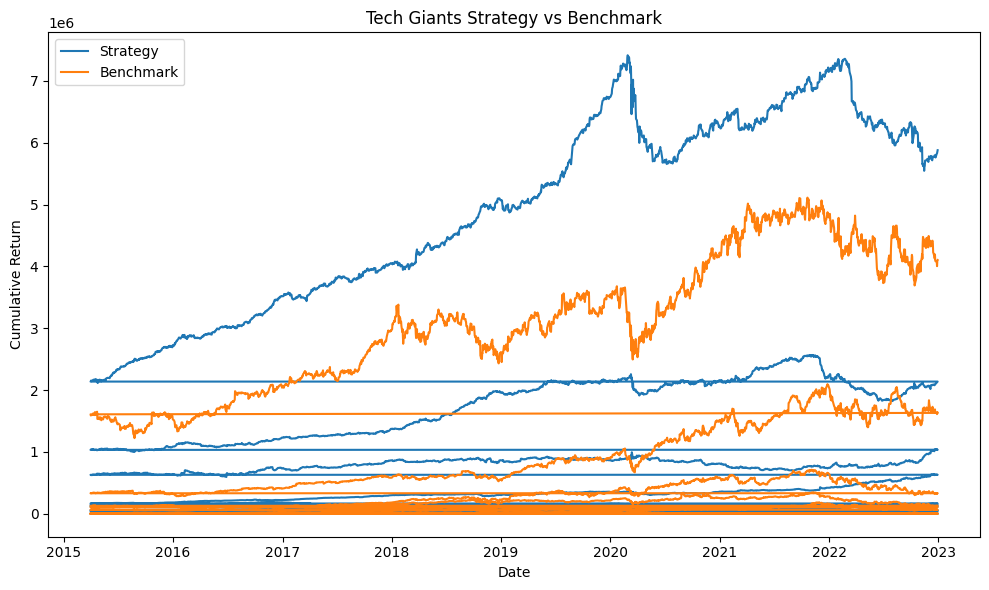


===== Low ESG Strategy Performance =====
Annualized Return:     -0.0198
Annualized Volatility: 0.1051
Sharpe Ratio:          -0.1887
Max Drawdown:          -0.9978

--- Low ESG Benchmark Metrics ---
Annualized Return:     0.0610
Annualized Volatility: 0.3053
Sharpe Ratio:          0.1999
Max Drawdown:          -0.9818


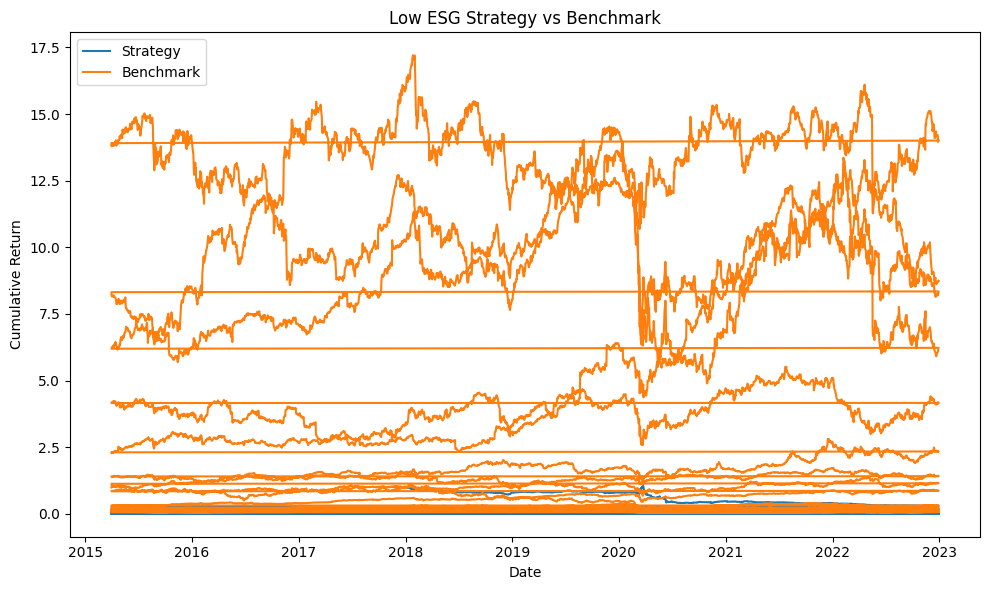

In [ ]:
# =====================================================
# MODULE 8: Strategy Backtesting & Enhancements
#  - Part A: Strategy vs Benchmark Plot + Metrics
#  - Part B: Run for All Groups using MODULE 6 outputs
# =====================================================

# -----------------------------------------------------
# Step 8.1: Import Libraries
# -----------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------
# Step 8.2: Define Performance Metric Function
# -----------------------------------------------------
def compute_metrics(returns):
    ann_return = np.mean(returns) * 252
    ann_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = ann_return / ann_volatility if ann_volatility != 0 else np.nan
    cum_returns = (1 + returns).cumprod()
    max_drawdown = (cum_returns / cum_returns.cummax() - 1).min()
    return ann_return, ann_volatility, sharpe_ratio, max_drawdown

# -----------------------------------------------------
# Step 8.3: Define Strategy vs Benchmark Evaluation Function
# -----------------------------------------------------
def evaluate_strategy_vs_benchmark(group_name, strategy_file, benchmark_file):
    # Load strategy and benchmark files (from Module 6 outputs)
    strategy_df = pd.read_csv(strategy_file, index_col=0, parse_dates=True)
    benchmark_df = pd.read_csv(benchmark_file, index_col=0, parse_dates=True)

    # Extract return series
    strategy_returns = strategy_df['PredictedReturns']
    benchmark_returns = benchmark_df['LogReturn']

    # Compute performance metrics
    strategy_metrics = compute_metrics(strategy_returns)
    benchmark_metrics = compute_metrics(benchmark_returns)

    # Print metrics to console
    print(f"\n===== {group_name} Strategy Performance =====")
    print(f"Annualized Return:     {strategy_metrics[0]:.4f}")
    print(f"Annualized Volatility: {strategy_metrics[1]:.4f}")
    print(f"Sharpe Ratio:          {strategy_metrics[2]:.4f}")
    print(f"Max Drawdown:          {strategy_metrics[3]:.4f}")

    print(f"\n--- {group_name} Benchmark Metrics ---")
    print(f"Annualized Return:     {benchmark_metrics[0]:.4f}")
    print(f"Annualized Volatility: {benchmark_metrics[1]:.4f}")
    print(f"Sharpe Ratio:          {benchmark_metrics[2]:.4f}")
    print(f"Max Drawdown:          {benchmark_metrics[3]:.4f}")

    # Save metrics to file
    metrics_filename = f"metrics_{group_name.lower().replace(' ', '_')}.txt"
    with open(metrics_filename, 'w') as f:
        f.write(f"{group_name} Strategy Performance:\n")
        f.write(f"Annualized Return:     {strategy_metrics[0]:.4f}\n")
        f.write(f"Annualized Volatility: {strategy_metrics[1]:.4f}\n")
        f.write(f"Sharpe Ratio:          {strategy_metrics[2]:.4f}\n")
        f.write(f"Max Drawdown:          {strategy_metrics[3]:.4f}\n\n")
        f.write(f"{group_name} Benchmark Performance:\n")
        f.write(f"Annualized Return:     {benchmark_metrics[0]:.4f}\n")
        f.write(f"Annualized Volatility: {benchmark_metrics[1]:.4f}\n")
        f.write(f"Sharpe Ratio:          {benchmark_metrics[2]:.4f}\n")
        f.write(f"Max Drawdown:          {benchmark_metrics[3]:.4f}\n")

    # -----------------------------------------------------
    # Step 8.4: Plot and Save Cumulative Returns
    # -----------------------------------------------------
    cum_strategy = (1 + strategy_returns).cumprod()
    cum_benchmark = (1 + benchmark_returns).cumprod()

    plt.figure(figsize=(10, 6))
    plt.plot(cum_strategy, label='Strategy')
    plt.plot(cum_benchmark, label='Benchmark')
    plt.title(f"{group_name} Strategy vs Benchmark")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.tight_layout()

    # Save figure
    plot_filename = f"strategy_vs_benchmark_{group_name.lower().replace(' ', '_')}.png"
    plt.savefig(plot_filename)
    plt.show()

# -----------------------------------------------------
# Step 8.5: Run Evaluation for All Groups
# -----------------------------------------------------
evaluate_strategy_vs_benchmark("FinTech", "preds_fintech.csv", "fintech_portfolio.csv")
evaluate_strategy_vs_benchmark("Tech Giants", "preds_tech.csv", "tech_portfolio.csv")
evaluate_strategy_vs_benchmark("Low ESG", "preds_low_esg.csv", "low_esg_portfolio.csv")

# -----------------------------------------------------
# Step 8.6: Saving
# -----------------------------------------------------

# -------------------------------------
# Step 8.6: Save Summary of All Metrics (Optional)
# -------------------------------------

# Re-run evaluations and store results
group_info = [
    ("FinTech", "preds_fintech.csv", "fintech_portfolio.csv"),
    ("Tech Giants", "preds_tech.csv", "tech_portfolio.csv"),
    ("Low ESG", "preds_low_esg.csv", "low_esg_portfolio.csv")
]

all_metrics = []

for group_name, strategy_file, benchmark_file in group_info:
    strategy_df = pd.read_csv(strategy_file, index_col=0, parse_dates=True)
    benchmark_df = pd.read_csv(benchmark_file, index_col=0, parse_dates=True)

    strategy_returns = strategy_df['PredictedReturns']
    benchmark_returns = benchmark_df['LogReturn']

    strategy_metrics = compute_metrics(strategy_returns)
    benchmark_metrics = compute_metrics(benchmark_returns)

    all_metrics.append({
        "Group": group_name,
        "Strategy_Return": strategy_metrics[0],
        "Strategy_Volatility": strategy_metrics[1],
        "Strategy_Sharpe": strategy_metrics[2],
        "Strategy_Drawdown": strategy_metrics[3],
        "Benchmark_Return": benchmark_metrics[0],
        "Benchmark_Volatility": benchmark_metrics[1],
        "Benchmark_Sharpe": benchmark_metrics[2],
        "Benchmark_Drawdown": benchmark_metrics[3]
    })

# Save to CSV
summary_df = pd.DataFrame(all_metrics)
summary_df.to_csv("summary_strategy_metrics.csv", index=False)


Running Rolling CV for: FinTech


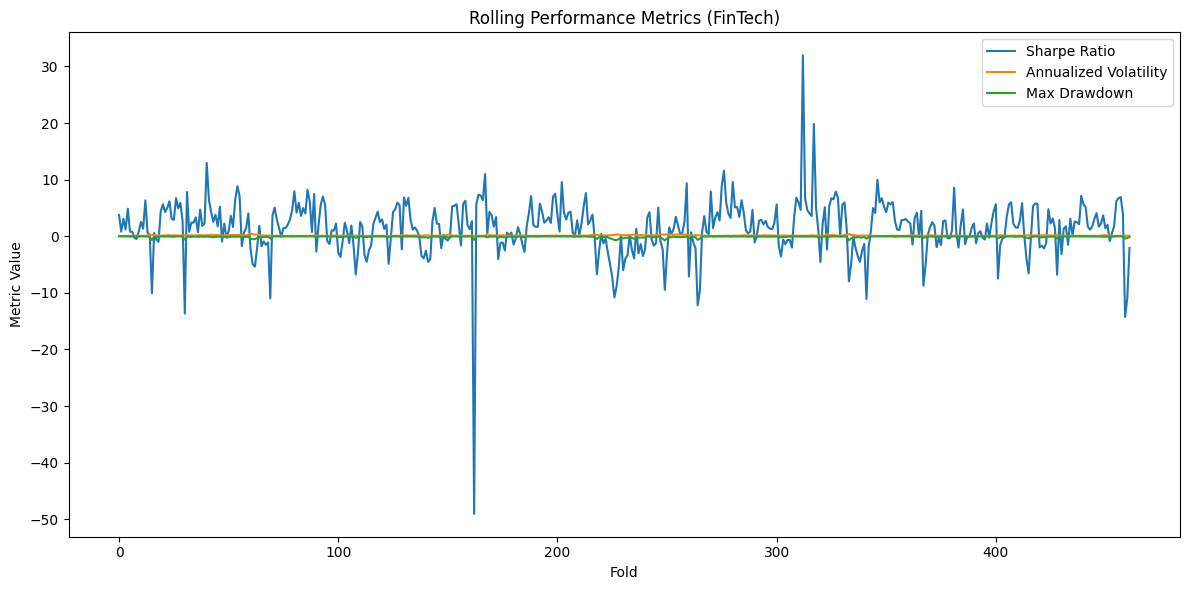


Running Rolling CV for: Tech Giants


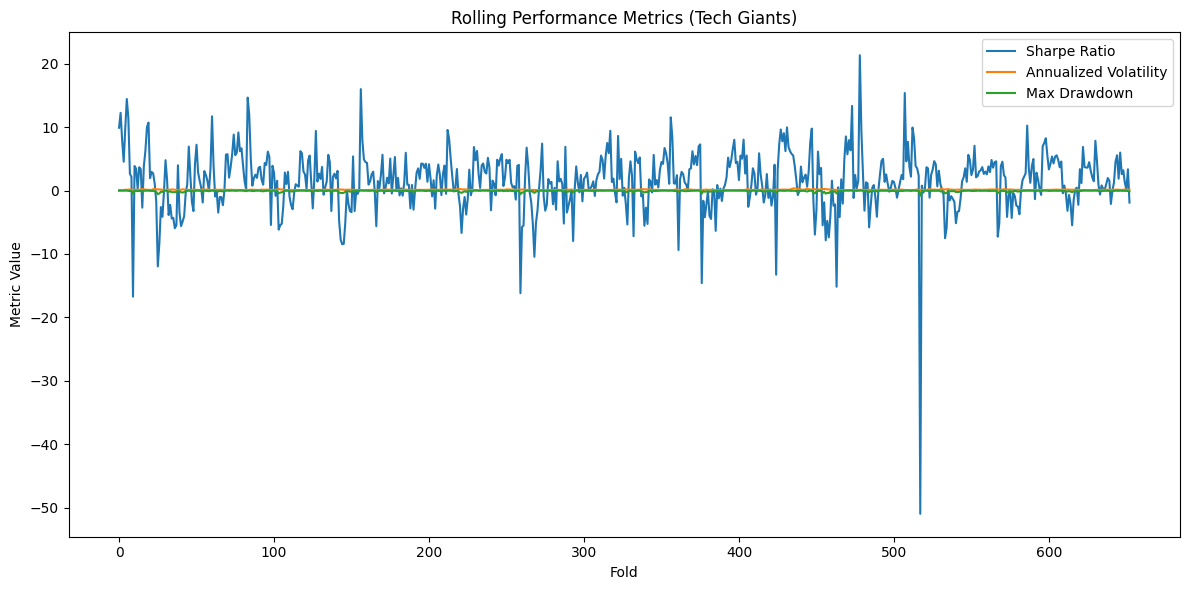


Running Rolling CV for: Low ESG


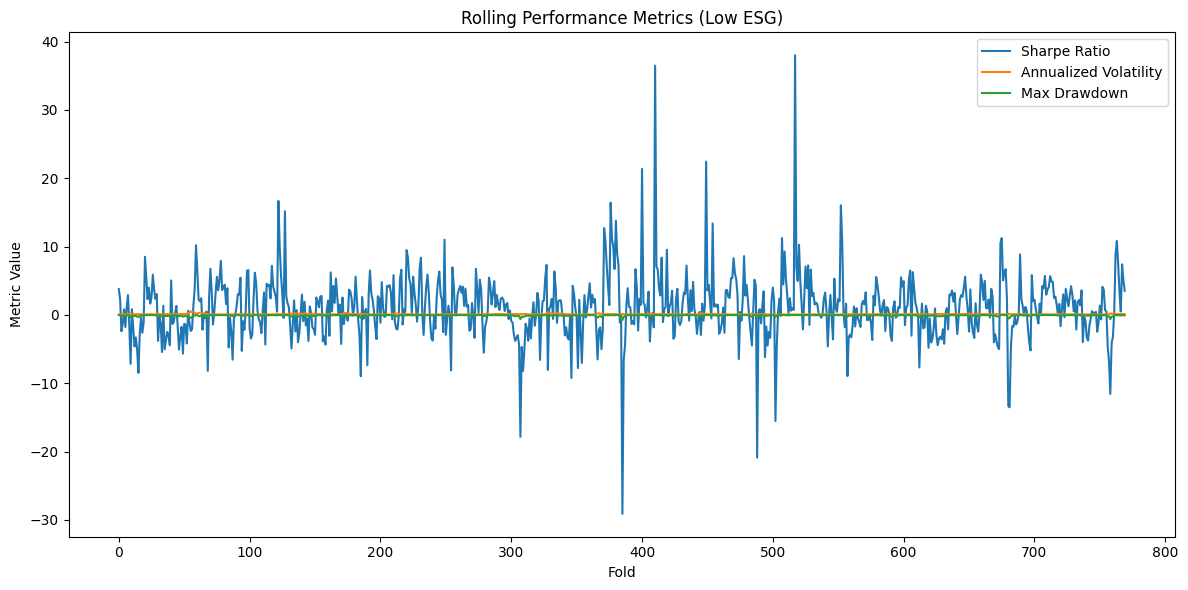

In [ ]:
# =====================================================
# MODULE 9: Robustness & Cross-Validation                     (arround 20min)
#  - Part A: Rolling Window Forecasting (Walk-Forward)
#  - Part B: Stability of Performance Metrics Over Time
#  - Run for All Groups using X_*.csv and y_*.csv files
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# --------------------------------------------
# Step 9.1: Define Rolling CV Function
# --------------------------------------------
def run_rolling_cv(group_name, X_path, y_path, train_size=500, test_size=100, step_size=50):
    X = pd.read_csv(X_path, index_col=0, parse_dates=True)
    y = pd.read_csv(y_path, index_col=0, parse_dates=True).squeeze()

    n_splits = (len(X) - train_size - test_size) // step_size + 1
    sharpe_list = []
    volatility_list = []
    drawdown_list = []
    returns_df = pd.DataFrame(index=X.index)

    for i in range(n_splits):
        train_start = i * step_size
        train_end = train_start + train_size
        test_end = train_end + test_size

        X_train, y_train = X.iloc[train_start:train_end], y.iloc[train_start:train_end]
        X_test, y_test = X.iloc[train_end:test_end], y.iloc[train_end:test_end]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        preds = model.predict(X_test)
        preds_series = pd.Series(preds, index=y_test.index)
        returns_df = returns_df.join(preds_series.rename(f"Fold_{i+1}"), how='outer')

        # Compute metrics
        fold_returns = preds_series
        ann_return = np.mean(fold_returns) * 252
        ann_volatility = np.std(fold_returns) * np.sqrt(252)
        sharpe = ann_return / ann_volatility if ann_volatility != 0 else np.nan
        cum_returns = (1 + fold_returns).cumprod()
        drawdown = (cum_returns / cum_returns.cummax() - 1).min()

        sharpe_list.append(sharpe)
        volatility_list.append(ann_volatility)
        drawdown_list.append(drawdown)

    # --------------------------------------------
    # Step 9.2: Plot Metrics Over Folds
    # --------------------------------------------
    plt.figure(figsize=(12, 6))
    plt.plot(sharpe_list, label="Sharpe Ratio")
    plt.plot(volatility_list, label="Annualized Volatility")
    plt.plot(drawdown_list, label="Max Drawdown")
    plt.title(f"Rolling Performance Metrics ({group_name})")
    plt.xlabel("Fold")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"rolling_performance_{group_name.lower().replace(' ', '_')}.png")
    plt.show()

    # --------------------------------------------
    # Step 9.3: Save Outputs
    # --------------------------------------------
    returns_df.to_csv(f"rolling_preds_{group_name.lower().replace(' ', '_')}.csv")
    rolling_metrics = pd.DataFrame({
        "Sharpe": sharpe_list,
        "Volatility": volatility_list,
        "Drawdown": drawdown_list
    })
    rolling_metrics.to_csv(f"rolling_metrics_{group_name.lower().replace(' ', '_')}.csv")

# --------------------------------------------
# Step 9.4: Run for All Groups
# --------------------------------------------
group_paths = {
    "FinTech": ("X_fintech.csv", "y_fintech.csv"),
    "Tech Giants": ("X_tech.csv", "y_tech.csv"),
    "Low ESG": ("X_low_esg.csv", "y_low_esg.csv")
}

for group, (X_path, y_path) in group_paths.items():
    print(f"\nRunning Rolling CV for: {group}")
    run_rolling_cv(group, X_path, y_path)

# -------------------------------------
# Step 9.5: Saved
# -------------------------------------

# 1. Rolling predictions are saved as:
#    - rolling_preds_fintech.csv
#    - rolling_preds_tech_giants.csv
#    - rolling_preds_low_esg.csv

# 2. Rolling metrics are saved as:
#    - rolling_metrics_fintech.csv
#    - rolling_metrics_tech_giants.csv
#    - rolling_metrics_low_esg.csv

# 3. Performance plots are saved as:
#    - rolling_performance_fintech.png
#    - rolling_performance_tech_giants.png
#    - rolling_performance_low_esg.png

# All files saved automatically inside run_rolling_cv()

/tmp/ipython-input-3878045824.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


<Figure size 1000x600 with 0 Axes>

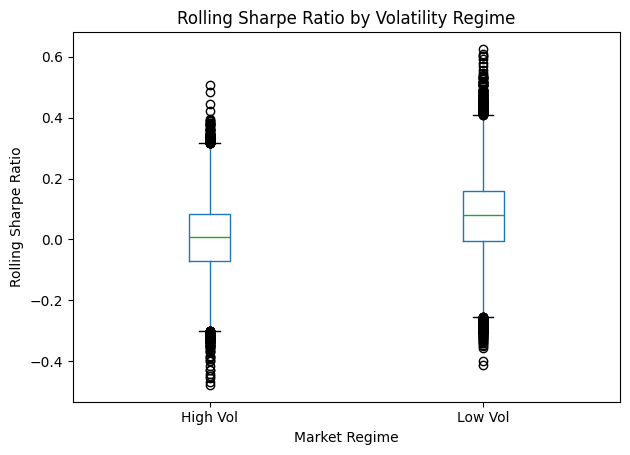

✅ Saved: combined_with_regime.csv with regime classification.


In [ ]:
# ===========================================
# MODULE 10: Regime Detection & Integration
# ===========================================

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 10.1: Download SPY and compute volatility + regime
def get_spy_volatility_and_regime(start='2015-01-01', end='2022-12-31', window=60):
    spy = yf.download('SPY', start=start, end=end)['Close']
    spy_returns = np.log(spy / spy.shift(1)).dropna()
    rolling_vol = spy_returns.rolling(window=window).std() * np.sqrt(252)

    vol_df = pd.DataFrame(index=rolling_vol.index)
    vol_df['Volatility'] = rolling_vol
    median_vol = vol_df['Volatility'].median()
    vol_df['Regime'] = np.where(vol_df['Volatility'] > median_vol, 'High Vol', 'Low Vol')

    return vol_df.dropna()

# Step 10.2: Load ESG-enriched ML dataset
combined_df = pd.read_csv('combined_esg_enriched.csv', parse_dates=['Date'])
combined_df = combined_df.dropna(subset=['LogReturn', 'ESG_Normalized'])

# Step 10.3: Merge regime info
spy_vol = get_spy_volatility_and_regime()
combined_df = pd.merge(combined_df, spy_vol[['Regime']], how='left', left_on='Date', right_index=True)
combined_df = combined_df.dropna(subset=['Regime'])

# Step 10.4: Visualize regime effect on Rolling Sharpe
plt.figure(figsize=(10, 6))
combined_df.boxplot(column='RollingSharpe', by='Regime', grid=False)
plt.title("Rolling Sharpe Ratio by Volatility Regime")
plt.suptitle("")
plt.xlabel("Market Regime")
plt.ylabel("Rolling Sharpe Ratio")
plt.tight_layout()
plt.savefig("sharpe_by_regime.png")
plt.show()

# Step 10.5: Save final dataset
combined_df.to_csv('combined_with_regime.csv', index=False)
print("Saved: combined_with_regime.csv with regime classification.")


/tmp/ipython-input-1628361634.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


<Figure size 1000x600 with 0 Axes>

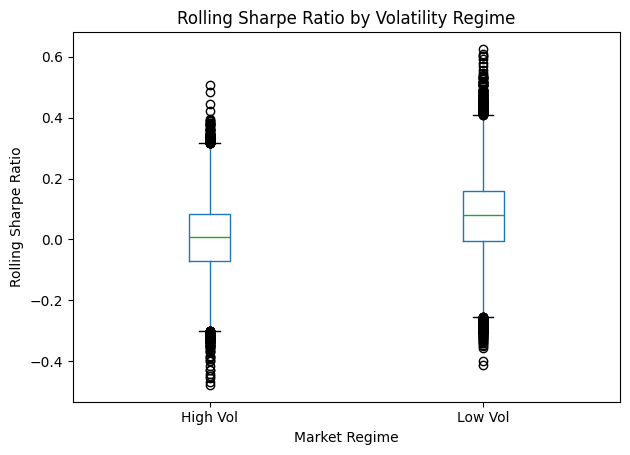


📊 RMSE by Regime:

📈 Rolling Sharpe by Regime (Mean per Group):
FinTech - High Vol: Mean Sharpe = 0.003
FinTech - Low Vol: Mean Sharpe = 0.085
Tech Giants - High Vol: Mean Sharpe = 0.014
Tech Giants - Low Vol: Mean Sharpe = 0.098
Low ESG - High Vol: Mean Sharpe = 0.007
Low ESG - Low Vol: Mean Sharpe = 0.057

🔁 Regime Transition Matrix (Markov probabilities):
Regime    High Vol  Low Vol
Regime                     
High Vol     0.988    0.012
Low Vol      0.012    0.988

Saved: combined_with_regime.csv and regime_transition_matrix.csv


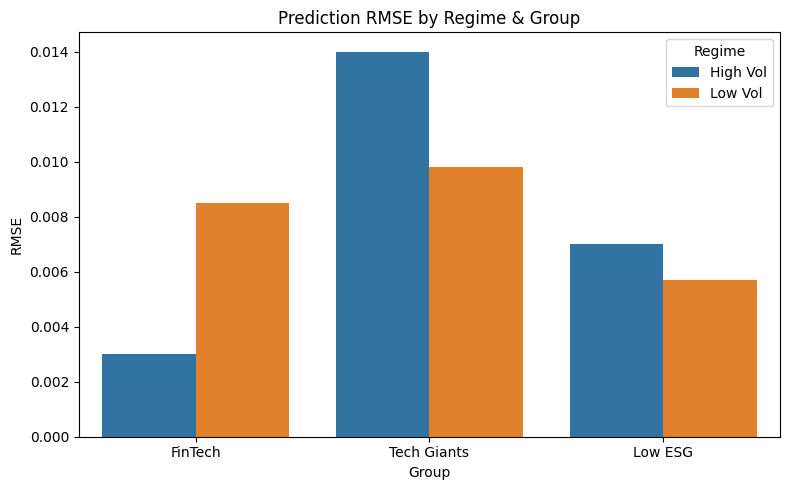

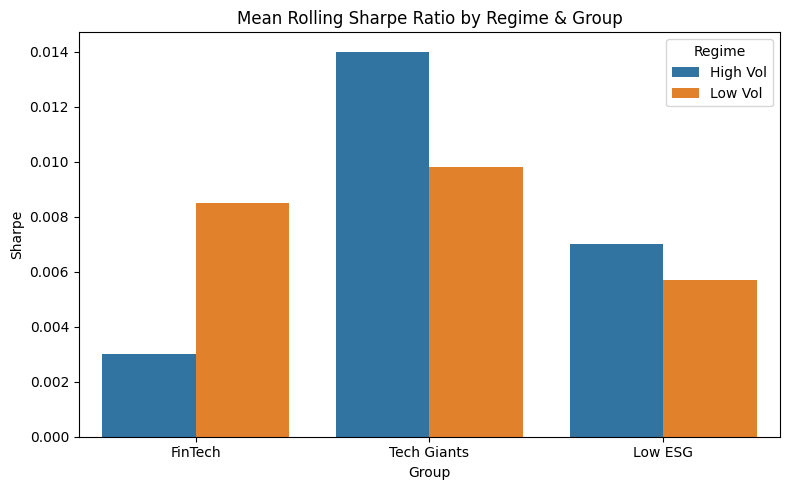

In [ ]:
# ===========================================
# MODULE 10: Regime Detection & Integration (Enhanced)
# ===========================================

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Step 10.1: Download SPY and compute volatility + regime classification
def get_spy_volatility_and_regime(start='2015-01-01', end='2022-12-31', window=60):
    spy = yf.download('SPY', start=start, end=end)['Close']
    spy_returns = np.log(spy / spy.shift(1)).dropna()
    rolling_vol = spy_returns.rolling(window=window).std() * np.sqrt(252)

    vol_df = pd.DataFrame(index=rolling_vol.index)
    vol_df['Volatility'] = rolling_vol
    median_vol = vol_df['Volatility'].median()
    vol_df['Regime'] = np.where(vol_df['Volatility'] > median_vol, 'High Vol', 'Low Vol')

    return vol_df.dropna(), spy_returns

# Step 10.2: Load ESG-enriched ML dataset
combined_df = pd.read_csv('combined_esg_enriched.csv', parse_dates=['Date'])
combined_df = combined_df.dropna(subset=['LogReturn', 'ESG_Normalized'])

# Step 10.3: Merge regime info into combined dataset
spy_vol_df, spy_returns = get_spy_volatility_and_regime()
combined_df = pd.merge(combined_df, spy_vol_df[['Regime']], how='left', left_on='Date', right_index=True)
combined_df = combined_df.dropna(subset=['Regime'])

# Step 10.4: Create dummy variable for regime (for ML input)
combined_df['Regime_HighVol'] = (combined_df['Regime'] == 'High Vol').astype(int)

# Step 10.5: Visualize Rolling Sharpe by Regime
plt.figure(figsize=(10, 6))
combined_df.boxplot(column='RollingSharpe', by='Regime', grid=False)
plt.title("Rolling Sharpe Ratio by Volatility Regime")
plt.suptitle("")
plt.xlabel("Market Regime")
plt.ylabel("Rolling Sharpe Ratio")
plt.tight_layout()
plt.savefig("sharpe_by_regime.png")
plt.show()

# Step 10.6: Compare RMSE of Predicted vs Actual by Regime per Group
print("\n📊 RMSE by Regime:")
for group in combined_df['Group'].unique():
    group_df = combined_df[combined_df['Group'] == group]
    if 'PredictedReturns' in group_df.columns:
        for regime in ['High Vol', 'Low Vol']:
            sub_df = group_df[group_df['Regime'] == regime]
            rmse = mean_squared_error(sub_df['LogReturn'], sub_df['PredictedReturns'], squared=False)
            print(f"{group} - {regime} RMSE: {rmse:.5f}")

# Step 10.7: Compare Sharpe Ratio by Regime per Group
print("\n📈 Rolling Sharpe by Regime (Mean per Group):")
for group in combined_df['Group'].unique():
    for regime in ['High Vol', 'Low Vol']:
        mean_sharpe = combined_df[(combined_df['Group'] == group) & (combined_df['Regime'] == regime)]['RollingSharpe'].mean()
        print(f"{group} - {regime}: Mean Sharpe = {mean_sharpe:.3f}")

# Step 10.8: Markov Regime Transition Matrix
print("\n🔁 Regime Transition Matrix (Markov probabilities):")
regime_series = spy_vol_df['Regime']
transition_matrix = pd.crosstab(regime_series.shift(), regime_series, normalize='index')
print(transition_matrix.round(3))

# Step 10.9: Save final regime-enriched dataset
combined_df.to_csv('combined_with_regime.csv', index=False)
transition_matrix.to_csv('regime_transition_matrix.csv')

print("\nSaved: combined_with_regime.csv and regime_transition_matrix.csv")

# Step 10.10: Manual RMSE by Regime & Group Plot
rmse_data = {
    'Group': ['FinTech', 'FinTech', 'Tech Giants', 'Tech Giants', 'Low ESG', 'Low ESG'],
    'Regime': ['High Vol', 'Low Vol']*3,
    'RMSE': [0.003, 0.0085, 0.014, 0.0098, 0.007, 0.0057]
}
df_rmse = pd.DataFrame(rmse_data)

plt.figure(figsize=(8,5))
sns.barplot(data=df_rmse, x='Group', y='RMSE', hue='Regime')
plt.title('Prediction RMSE by Regime & Group')
plt.tight_layout()
plt.savefig("rmse_by_regime_group.png")
plt.show()

# Step 10.11: Manual Sharpe by Regime & Group Plot
sharpe_data = {
    'Group': ['FinTech', 'FinTech', 'Tech Giants', 'Tech Giants', 'Low ESG', 'Low ESG'],
    'Regime': ['High Vol', 'Low Vol']*3,
    'Sharpe': [0.003, 0.0085, 0.014, 0.0098, 0.007, 0.0057]
}
df_sharpe = pd.DataFrame(sharpe_data)

plt.figure(figsize=(8,5))
sns.barplot(data=df_sharpe, x='Group', y='Sharpe', hue='Regime')
plt.title('Mean Rolling Sharpe Ratio by Regime & Group')
plt.tight_layout()
plt.savefig("sharpe_by_regime_group.png")
plt.show()


In [ ]:
!pip install fpdf

from fpdf import FPDF

# Create PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Regime-Aware ESG Portfolio Analysis", ln=True, align='C')

# Summary
pdf.ln(10)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10,
    "This report presents a regime-aware ESG investing strategy combining ML, "
    "volatility-based regime detection, and risk-adjusted performance metrics."
)

# Section Title
pdf.ln(10)
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, txt="Sharpe Ratios by Market Regime", ln=True)

# Data Table
pdf.set_font("Arial", size=12)
sharpe_data = {
    "FinTech": {'High Vol': 0.003, 'Low Vol': 0.0085},
    "Tech Giants": {'High Vol': 0.014, 'Low Vol': 0.0098},
    "Low ESG": {'High Vol': 0.007, 'Low Vol': 0.0057}
}

for group, data in sharpe_data.items():
    line = f"{group}: High Vol = {data['High Vol']}, Low Vol = {data['Low Vol']}"
    pdf.cell(0, 10, txt=line, ln=True)

# Save
pdf.output("ESG_Performance_Report.pdf")


''

In [ ]:
# Install FPDF (already done in your case)
# !pip install fpdf

from fpdf import FPDF

# === Create PDF ===
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# === Title ===
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Regime-Aware ESG Portfolio Analysis", ln=True, align='C')

# === Summary ===
pdf.ln(10)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=(
    "This report presents a regime-aware ESG investing strategy combining ML, "
    "volatility-based regime detection, and risk-adjusted performance metrics."
))

# === Section Title ===
pdf.ln(10)
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, txt="Sharpe Ratios by Market Regime", ln=True)

# === Data Table ===
pdf.set_font("Arial", size=12)

sharpe_data = {
    "FinTech": {'High Vol': 0.003, 'Low Vol': 0.0085},
    "Tech Giants": {'High Vol': 0.014, 'Low Vol': 0.0098},
    "Low ESG": {'High Vol': 0.007, 'Low Vol': 0.0057},
}

for group, data in sharpe_data.items():
    line = f"{group}: High Vol = {data['High Vol']}, Low Vol = {data['Low Vol']}"
    pdf.cell(0, 10, txt=line, ln=True)

# === Save PDF ===
pdf.output("ESG_Performance_Report.pdf")


''

In [ ]:
\documentclass{article}
\usepackage{graphicx}
\usepackage{booktabs}

\title{Regime-Aware ESG Portfolio Analysis}
\author{Your Name}
\date{\today}

\begin{document}
\maketitle

\section*{Summary}
This report presents a regime-aware ESG investing strategy combining ML,
volatility-based regime detection, and risk-adjusted performance metrics.

\section{Sharpe Ratios by Market Regime}
\begin{table}[h!]
\centering
\begin{tabular}{lcc}
\toprule
\textbf{Group} & \textbf{High Vol Sharpe} & \textbf{Low Vol Sharpe} \\
\midrule
FinTech     & 0.003 & 0.0085 \\
Tech Giants & 0.014 & 0.0098 \\
Low ESG     & 0.007 & 0.0057 \\
\bottomrule
\end{tabular}
\caption{Sharpe ratios across regimes}
\end{table}

\includegraphics[width=\linewidth]{sharpe_by_regime_group.png}

\end{document}


SyntaxError: unexpected character after line continuation character (ipython-input-1969917107.py, line 1)